# Looking for the **"All-in-one"** notebook?

It's located [here at this link](https://colab.research.google.com/drive/19jZDFIqD-ABndSgd1EQzSl_soQ-FU4J-#scrollTo=e-xLewmU4p0s&uniqifier=1)

<br>

#   Homework 8
+ clasification via decision trees and random forests...
+ which are both "the same" as k-nearest-neighbors, and
+ "the opposite" of k-nearest-neighbors!

It all hinges on how we define ***near*** .

Let's see how it works:



# Decision Trees: Iris Example

In [ ]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [ ]:
# let's read in our flower data...
#
# be sure to upload iris_cleaned.csv, which should be in the zip archive for this week
#
filename = 'iris_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

iris_cleaned.csv : file read into a pandas dataframe.


In [ ]:
#
# different version vary on how to see all rows (adapt to suit your system!)
#
print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()  # prints column information

# easiest way to print all rows:   print(df_tidy.to_string())
# or, in table form:
# pd.set_option("display.min_rows",150)  # 10 is default
# pd.set_option("display.max_rows",150)  # 10 is default
# or, the deafult:
df_tidy


df_tidy.shape is (141, 6)

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 140
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sepallen  141 non-null    float64
 1   sepalwid  141 non-null    float64
 2   petallen  141 non-null    float64
 3   petalwid  141 non-null    float64
 4   irisname  141 non-null    object 
 5   irisnum   141 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.7+ KB


sepallen  sepalwid  petallen  petalwid   irisname  irisnum
0         4.6       3.6       1.0       0.2     setosa        0
1         4.3       3.0       1.1       0.1     setosa        0
2         5.0       3.2       1.2       0.2     setosa        0
3         5.8       4.0       1.2       0.2     setosa        0
4         4.4       3.0       1.3       0.2     setosa        0
..        ...       ...       ...       ...        ...      ...
136       7.9       3.8       6.4       2.0  virginica        2
137       7.6       3.0       6.6       2.1  virginica        2
138       7.7       3.8       6.7       2.2  virginica        2
139       7.7       2.8       6.7       2.0  virginica        2
140       7.7       2.6       6.9       2.3  virginica        2

[141 rows x 6 columns]

In [ ]:
#
# All of the columns need to be numeric, we'll drop irisname
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop( 'irisname', axis=COLUMN )
df_model1

sepallen  sepalwid  petallen  petalwid  irisnum
0         4.6       3.6       1.0       0.2        0
1         4.3       3.0       1.1       0.1        0
2         5.0       3.2       1.2       0.2        0
3         5.8       4.0       1.2       0.2        0
4         4.4       3.0       1.3       0.2        0
..        ...       ...       ...       ...      ...
136       7.9       3.8       6.4       2.0        2
137       7.6       3.0       6.6       2.1        2
138       7.7       3.8       6.7       2.2        2
139       7.7       2.8       6.7       2.0        2
140       7.7       2.6       6.9       2.3        2

[141 rows x 5 columns]

In [ ]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = {'setosa':0,'versicolor':1,'virginica':2}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['sepallen', 'sepalwid', 'petallen', 'petalwid', 'irisnum'], dtype='object')

COLUMNS[0] is sepallen

COL_INDEX is {'sepallen': 0, 'sepalwid': 1, 'petallen': 2, 'petalwid': 3, 'irisnum': 4}


setosa maps to 0
versicolor maps to 1
virginica maps to 2


In [ ]:
#
# We _could_ reweight our columns...
# For exmaple, if petalwid were "worth" 20x more than the others?
#

# df_model1['petalwid'] *= 20
# df_model1

#
# With decision trees (and random forests), we don't need to
#      adjust the "exchange-rates" among features
#
#      Instead, we let the various if/else branches separate
#      the data into subsets that we _allow_ to be compared!
#

In [ ]:
#
# let's convert our dataframe to a numpy array, named A
#
A = df_model1.to_numpy()  # convert to an array
A = A.astype('float64')   # make sure it's all floating point
print(A[:5])  # see the first 5 rows

[[4.6 3.6 1.  0.2 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [4.4 3.  1.3 0.2 0. ]]


In [ ]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 141 rows and 5 cols


In [ ]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 140
print(f"flower #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

species_index = COL_INDEX['irisnum']
species_num = int(round(A[n][species_index]))
species = SPECIES[species_num]
print(f"  Its species is {species} (i.e., {species_num})")

flower #140 is [7.7 2.6 6.9 2.3 2. ]
  Its sepallen is 7.7
  Its sepalwid is 2.6
  Its petallen is 6.9
  Its petalwid is 2.3
  Its irisnum is 2.0
  Its species is virginica (i.e., 2)


In [ ]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:4]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,4]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
X_all (just the features, first few rows) are 
 [[4.6 3.6 1.  0.2]
 [4.3 3.  1.1 0.1]
 [5.  3.2 1.2 0.2]
 [5.8 4.  1.2 0.2]
 [4.4 3.  1.3 0.2]]


In [ ]:
#
# we scramble the data, to remove (potential) dependence on its ordering:
#
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [1. 0. 1. 2. 1. 2. 2. 1. 1. 0. 1. 2. 0. 0. 0. 2. 0. 2. 1. 2. 1. 2. 2. 1.
 1. 1. 2. 1. 0. 1. 0. 2. 0. 1. 0. 0. 1. 2. 1. 0. 0. 2. 2. 1. 1. 2. 0. 0.
 1. 0. 1. 1. 1. 2. 0. 2. 1. 2. 0. 2. 1. 0. 2. 0. 0. 2. 2. 0. 2. 1. 1. 2.
 2. 0. 1. 1. 1. 2. 0. 0. 2. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 1. 2. 2. 1.
 1. 0. 0. 0. 2. 0. 1. 0. 0. 0. 2. 2. 1. 1. 0. 2. 2. 1. 0. 2. 0. 1. 2. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 2. 1. 0. 0. 1. 1. 2. 0. 1. 0. 2. 1. 0.]
The corresponding data rows are 
 [[5.8 2.7 3.9 1.2]
 [4.7 3.2 1.6 0.2]
 [6.  3.4 4.5 1.6]
 [5.7 2.5 5.  2. ]
 [6.7 3.  5.  1.7]]


In [ ]:
#
# We next separate into test data and training data ...
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 112 rows;  testing with 29 rows

Held-out data... (testing data: 29)
y_test: [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

X_test (few rows): [[6.4 2.9 4.3 1.3]
 [6.5 3.  5.2 2. ]
 [5.2 3.5 1.5 0.2]
 [5.7 2.6 3.5 1. ]
 [6.2 2.8 4.8 1.8]]

Data used for modeling... (training data: 112)
y_train: [2. 0. 0. 0. 0. 1. 1. 2. 1. 2. 1. 0. 1. 0. 0. 0. 0. 2. 1. 1. 0. 0. 2. 0.
 0. 1. 1. 2. 1. 0. 1. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 2.
 0. 0. 1. 1. 2. 2. 0. 0. 2. 0. 0. 0. 1. 2. 0. 2. 2. 2. 1. 1. 2. 0. 2. 1.
 2. 1. 2. 1. 0. 1. 1. 1. 1. 2. 2. 1. 1. 0. 2. 1. 1. 2. 0. 0. 2. 2. 0. 1.
 0. 0. 0. 2. 2. 2. 1. 1. 2. 2. 0. 1. 2. 0. 1. 2.]

X_train (few rows): [[6.9 3.1 5.4 2.1]
 [4.9 3.  1.4 0.2]
 [5.  3.3 1.4 0.2]
 [5.5 3.5 1.3 0.2]
 [4.8 3.4 1.6 0.2]]


<br>

#### Here is where the model-buidling begins in earnest...

In [ ]:
#
# +++ This is the "Model-building and Model-training Cell"
#
# Create a DT model and train it!
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 1


<br>

#### That's it! :-)

In [ ]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1.]
Actual  labels  : [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

Results on test set:  15 correct out of 29 total.


In [ ]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :   versicolor versicolor     
row   1 :   versicolor virginica      incorrect
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :   versicolor virginica      incorrect
row   5 :   versicolor virginica      incorrect
row   6 :   versicolor versicolor     
row   7 :   versicolor virginica      incorrect
row   8 :   versicolor virginica      incorrect
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :   versicolor virginica      incorrect
row  15 :   versicolor virginica      incorrect
row  16 :       setosa setosa         
row  17 :   versicolor virginica      incorrect
row  18 :       setosa setosa         
row  19 :   versicolor virginica      incorrect
row  20 :   versicolor versicolor     
row  21 :   versicolor virginica      incorrect
row  22 :   versicolor virginica      incor

15

<br>

#### The online tree-visualizer is at [http://viz-js.com/](http://viz-js.com/)

In [ ]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petallen <= 2.6\ngini = 0.665\nsamples = 112\nvalue = [38, 40, 34]\nclass = versicolor", fillcolor="#fafefc"] ;
1 [label="gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.497\nsamples = 74\nvalue = [0, 40, 34]\nclass = versicolor", fillcolor="#e1fbec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


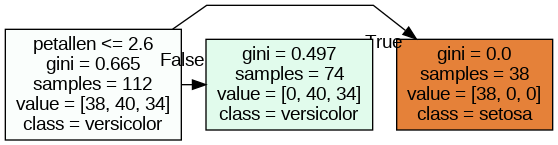

In [ ]:
#
# not as nice-looking, but all-in-one:
#

import pydotplus #pip install pydotplus
from IPython import display

graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("tree.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell


<br>

#### The online tree-visualizer is at [http://viz-js.com/](http://viz-js.com/)

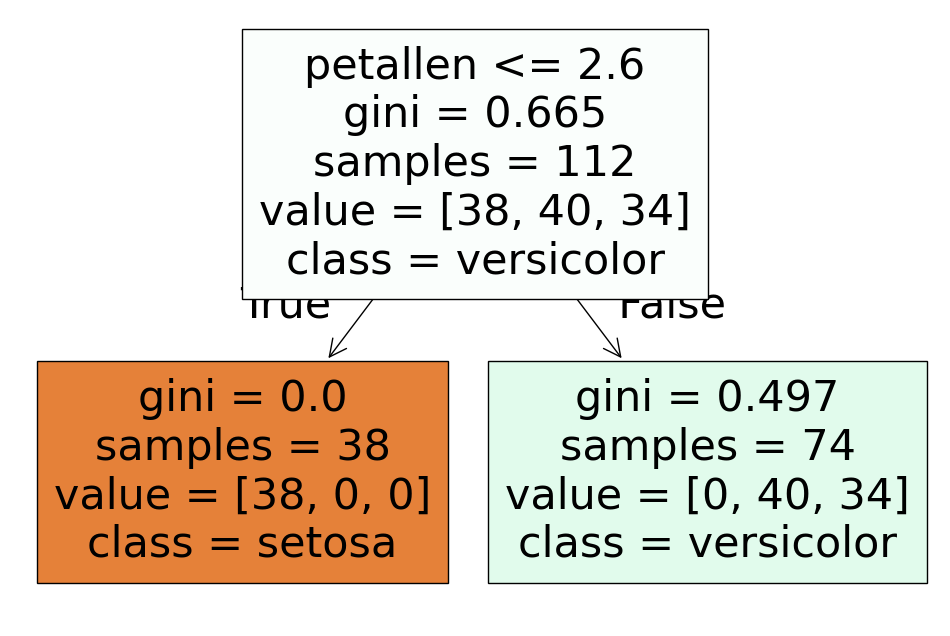

In [ ]:
#
# Let's render it right here!

import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:4]

#
# Treeing!
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(dtree_model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

plt.show()

In [ ]:
#
# Now, we TUNE the model (with cross-validation)...
#
# We used a depth of 1    (only 1 split)
# There's NO way to model three species with only 1 split!
#
# So, we try several depths...
# Here, the tradeoff is not so much "more accurate"
#   + deeper always has the potential to be more accurate
#   + but at the risk of _overfitting_ the training data!
#
# Rather it's the underfitting(bias)/overfitting(variance) tradeoff
#   + A heuristic: "Choose the _smallest_ depth at which the accuracy has plateaued"
#   + that is, is close to maximum...
#

In [ ]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,20):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d



# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our underfitting/overfitting balance.")

depth:  1  cv accuracy:  0.6964
depth:  2  cv accuracy:  0.9458
depth:  3  cv accuracy:  0.9549
depth:  4  cv accuracy:  0.9462
depth:  5  cv accuracy:  0.9462
depth:  6  cv accuracy:  0.9462
depth:  7  cv accuracy:  0.9553
depth:  8  cv accuracy:  0.9553
depth:  9  cv accuracy:  0.9553
depth: 10  cv accuracy:  0.9553
depth: 11  cv accuracy:  0.9462
depth: 12  cv accuracy:  0.9462
depth: 13  cv accuracy:  0.9553
depth: 14  cv accuracy:  0.9462
depth: 15  cv accuracy:  0.9553
depth: 16  cv accuracy:  0.9553
depth: 17  cv accuracy:  0.9462
depth: 18  cv accuracy:  0.9553
depth: 19  cv accuracy:  0.9553

best_depth = 7 with acc: 0.9553359683794467 is our underfitting/overfitting balance.


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 7


<br>

#### <b>To try</b>:  showing the depth 2+ tree

In [ ]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [38, 40, 34]\nclass = versicolor", fillcolor="#fafefc"] ;
1 [label="gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petallen <= 4.85\ngini = 0.497\nsamples = 74\nvalue = [0, 40, 34]\nclass = versicolor", fillcolor="#e1fbec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor", fillcolor="#39e581"] ;
2 -> 3 ;
4 [label="petalwid <= 1.75\ngini = 0.188\nsamples = 38\nvalue = [0, 4, 34]\nclass = virginica", fillcolor="#9050e8"] ;
2 -> 4 ;
5 [label="petallen <= 5.35\ngini = 0.49\nsamples = 7\nvalue =

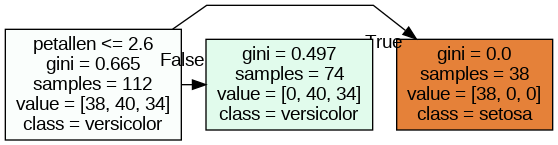

In [ ]:
#
# You will likely have a different name...
#
from IPython import display
display.Image("./tree.png", width=400)  # adjust for your tree!

In [ ]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 2. 0. 1. 1. 2. 1. 2. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 0. 2. 1. 1. 2. 2.
 1. 0. 1. 0. 1.]
Actual labels: [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :   versicolor virginica      incorrect
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :    virginica virginica      
row   8 :    virginica virginica      
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :    virginica virginica      
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :    virginica virginica      
row  18 :       setosa setosa         
row  19 :    virginica virg

25

In [ ]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth)

Created and trained a 'final' DT classifier with max depth = 7


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)

    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    #print(f"{name} ({predicted_species})")
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [4.6,3.1,2.0,1.5]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} {SPECIES[result]} from Features {Features}")

I predict 0 setosa from Features [4.6, 3.1, 2.0, 1.5]


In [ ]:
#
# try it on new, "unseen" data!
#

LoF = [[4.8, 3.1, 1.6, 0.2 ],
[5.7, 2.9, 4.2, 1.3 ],
[5.8, 2.7, 5.1, 1.9 ],
[5.2, 4.1, 1.5, 0.1 ],
[5.4, 3.4, 1.5, 0.4 ],
[5.1, 2.5, 3.0, 1.1 ],
[6.2, 2.9, 4.3, 1.3 ],
[6.3, 3.3, 6.0, 2.5 ],
[5.7, 2.8, 4.1, 1.3 ]]

for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# here are the correctly-coded species: 012001122
# almost always the final one is "wrong"
# (It's a virginica that "acts like" a versicolor.)

I predict 0 from Features [4.8, 3.1, 1.6, 0.2]
I predict 1 from Features [5.7, 2.9, 4.2, 1.3]
I predict 2 from Features [5.8, 2.7, 5.1, 1.9]
I predict 0 from Features [5.2, 4.1, 1.5, 0.1]
I predict 0 from Features [5.4, 3.4, 1.5, 0.4]
I predict 1 from Features [5.1, 2.5, 3.0, 1.1]
I predict 1 from Features [6.2, 2.9, 4.3, 1.3]
I predict 2 from Features [6.3, 3.3, 6.0, 2.5]
I predict 1 from Features [5.7, 2.8, 4.1, 1.3]


### The model is complete
+ and can predict _any_ future...
+ ... though not always correctly.
+ Let's plot many of them!

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
petallen = 4.95
petalwid = 1.0

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for sepallen in VERTICAL: # for every sepal length
  for sepalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


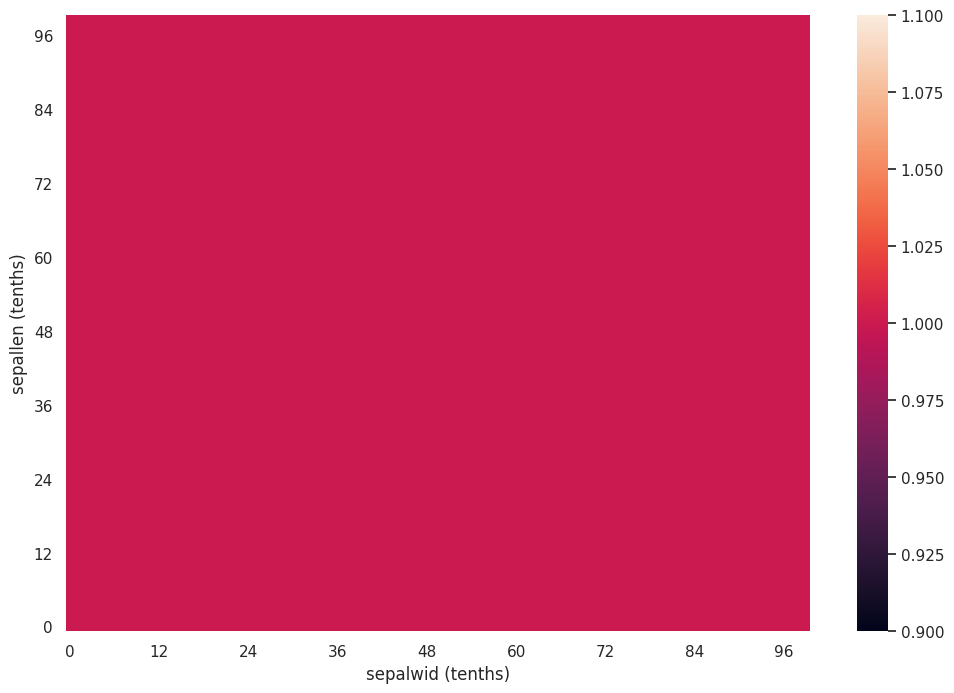

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="sepalwid (tenths)", ylabel="sepallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

In [ ]:
#
# let's hold the sepal length and width constant and vary petal len + wid:

sepallen = 3.42
sepalwid = 3.42

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANEv2 = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANEv2[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANEv2[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


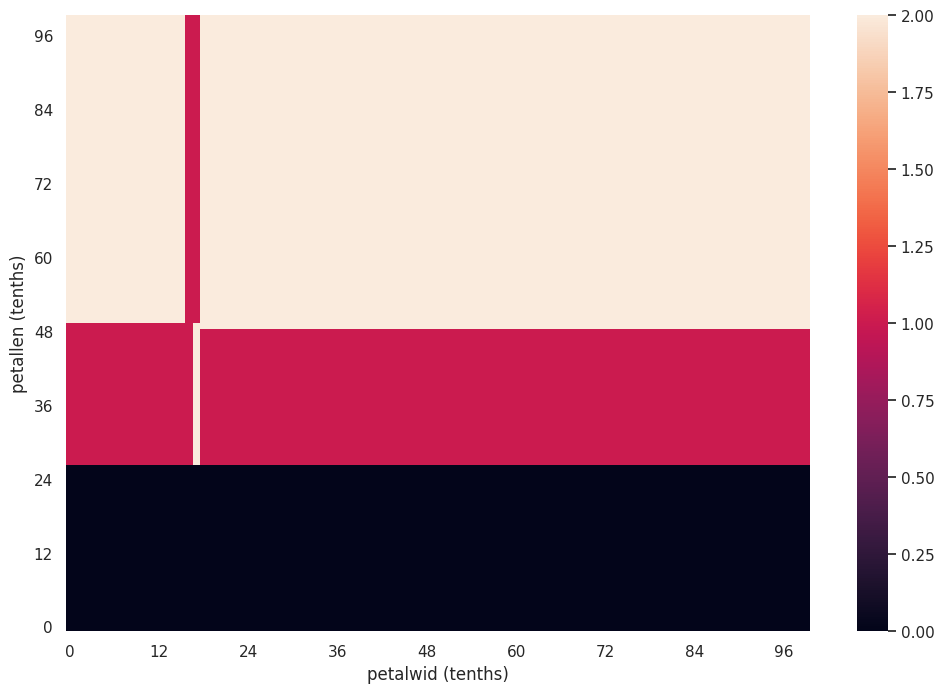

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANEv2)
ax.invert_yaxis()
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

In [ ]:
#
# feature importances!
#
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked
#
# feature importances are often even more "important" than predictions,
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.01418654 0.01418654 0.55335044 0.41827649]

Feature     sepallen has    1.42% of the decision-making importance.
Feature     sepalwid has    1.42% of the decision-making importance.
Feature     petallen has   55.34% of the decision-making importance.
Feature     petalwid has   41.83% of the decision-making importance.


In [ ]:
#
# That's it!  Welcome to the world of Decision-Tree models!
#

#
# But wait, there's more!  More workflows, and more trees!  Random Forests next:
#

# Random Forests: Iris Example

In [ ]:
#
# Random Forests!!!
#

# Lots of trees, each using a subset of the data usually at a limited depth
#                These many trees then get together to "vote" on the correct classification...

#
# This is an example of an "ensemble" classifier, because a RF is simply an ensemble of many DTs.
#

In [ ]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#
# Create a RF model and train it!
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d,
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)
# This max_samples=0.5 is the fraction of rows to use for each DT
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")

Built an RF with depth=1 and number of trees=42


In [ ]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 1.]
Actual  labels  : [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

Results on test set:  27 correct out of 29 total.
row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :    virginica virginica      
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :    virginica virginica      
row   8 :    virginica virginica      
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :    virginica virginica      
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :    virginica virginica      
row  18 :       setosa

27

In [ ]:
#
# we can get the individual trees, if we want...
#
tree_index = 26   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                       random_state=1118362830)
file rf_tree_026.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 1.7\ngini = 0.65\nsamples = 45\nvalue = [13, 23, 20]\nclass = versicolor", fillcolor="#effdf5"] ;
1 [label="gini = 0.52\nsamples = 30\nvalue = [13, 22, 2]\nclass = versicolor", fillcolor="#b5f5d0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.1\nsamples = 15\nvalue = [0, 1, 18]\nclass = virginica", fillcolor="#8844e6"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


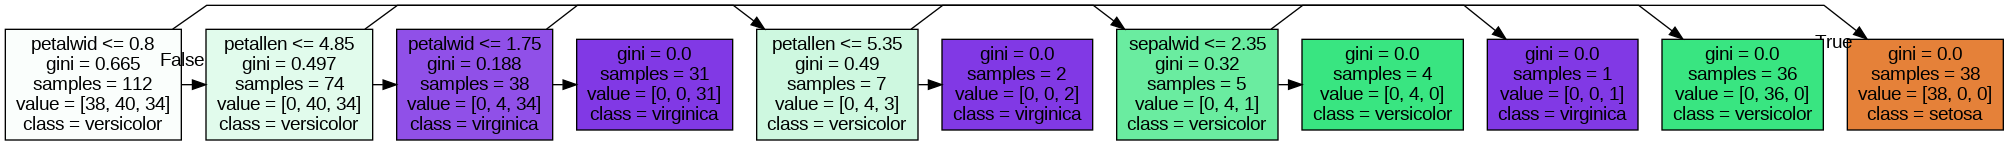

In [ ]:
#
# add locally, to this notebook...
#

#
# not as nice-looking, but all-in-one:
#

from IPython import display

graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("rf_tree_26.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell



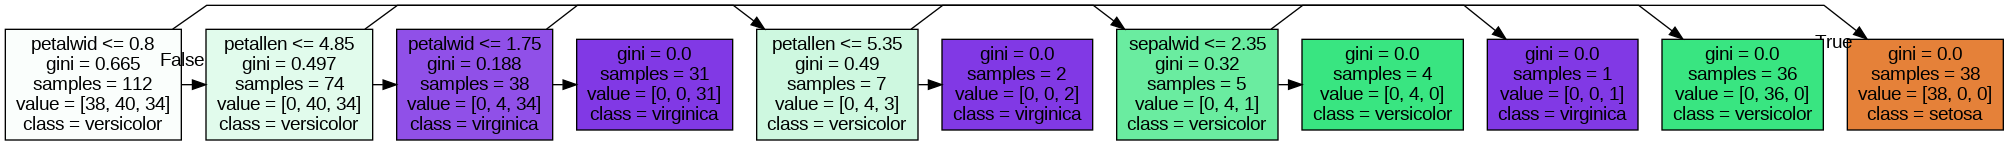

In [ ]:
display.Image("./rf_tree_26.png", width=900)  # adjust for your treename/size!

In [ ]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We previously used a depth of 1  and #trees of 42
#
# So, we try several depths to find best_d
#            and several #'s of trees to find best_ntrees
#
# The tradeoff is underfitting/overfitting and time...
#     "too many trees" tends may add noticeably to execution time

In [ ]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d,
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

#
# our task: assign best values by keeping a "running max"
#
best_depth = best_d
best_num_trees = best_ntrees

print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.9372
depth:  1 ntrees: 150 cv accuracy:  0.9281
depth:  1 ntrees: 250 cv accuracy:  0.9545
depth:  2 ntrees:  50 cv accuracy:  0.9545
depth:  2 ntrees: 150 cv accuracy:  0.9545
depth:  2 ntrees: 250 cv accuracy:  0.9545
depth:  3 ntrees:  50 cv accuracy:  0.9545
depth:  3 ntrees: 150 cv accuracy:  0.9545
depth:  3 ntrees: 250 cv accuracy:  0.9545
depth:  4 ntrees:  50 cv accuracy:  0.9458
depth:  4 ntrees: 150 cv accuracy:  0.9545
depth:  4 ntrees: 250 cv accuracy:  0.9545
depth:  5 ntrees:  50 cv accuracy:  0.9636
depth:  5 ntrees: 150 cv accuracy:  0.9545
depth:  5 ntrees: 250 cv accuracy:  0.9545

best_depth: 5 and best_num_trees: 50 are our choices. Acc: 0.9636363636363636


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=5 and ntrees=50


In [ ]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 2. 0. 1. 1. 2. 1. 2. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 0. 2. 1. 1. 2. 2.
 1. 0. 1. 0. 1.]
Actual  labels  : [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

Results on test set:  25 correct out of 29 total.
row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :   versicolor virginica      incorrect
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :    virginica virginica      
row   8 :    virginica virginica      
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :    virginica virginica      
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :    virginica virginica      
row  18 :    

25

In [ ]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=5 and ntrees=50


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)

    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    #print( f"{name} ({predicted_species})" )
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,2.1]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict 2 from Features [6.7, 3.3, 5.7, 2.1]


In [ ]:
#
# try it on new, "unseen" data!
#

LoF = [[4.8, 3.1, 1.6, 0.2 ],
[5.7, 2.9, 4.2, 1.3 ],
[5.8, 2.7, 5.1, 1.9 ],
[5.2, 4.1, 1.5, 0.1 ],
[5.4, 3.4, 1.5, 0.4 ],
[5.1, 2.5, 3.0, 1.1 ],
[6.2, 2.9, 4.3, 1.3 ],
[6.3, 3.3, 6.0, 2.5 ],
[5.7, 2.8, 4.1, 1.3 ]]

for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# these flowers' coded species: 012001122

I predict 0 from Features [4.8, 3.1, 1.6, 0.2]
I predict 1 from Features [5.7, 2.9, 4.2, 1.3]
I predict 2 from Features [5.8, 2.7, 5.1, 1.9]
I predict 0 from Features [5.2, 4.1, 1.5, 0.1]
I predict 0 from Features [5.4, 3.4, 1.5, 0.4]
I predict 1 from Features [5.1, 2.5, 3.0, 1.1]
I predict 1 from Features [6.2, 2.9, 4.3, 1.3]
I predict 2 from Features [6.3, 3.3, 6.0, 2.5]
I predict 1 from Features [5.7, 2.8, 4.1, 1.3]


### Let's see our predictive model!

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
petallen = 4.2
petalwid = 1.042

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for sepallen in VERTICAL: # for every sepal length
  for sepalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


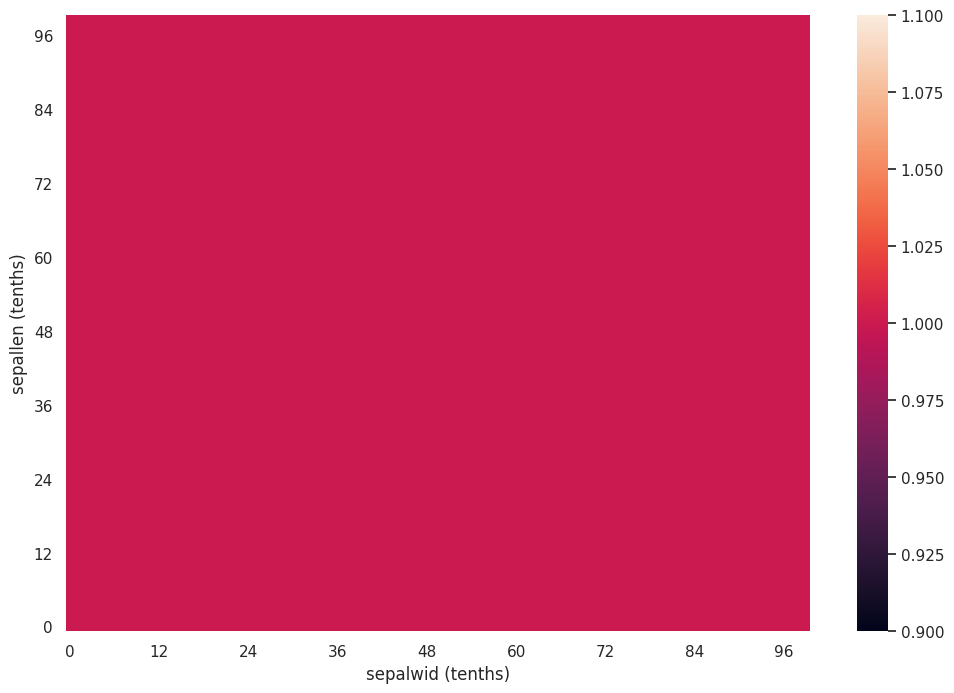

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="sepalwid (tenths)", ylabel="sepallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

In [ ]:
#
# let's hold the sepal length and width constant and vary petal len + wid:

sepallen = 3.42
sepalwid = 3.42

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANEv2 = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANEv2[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANEv2[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


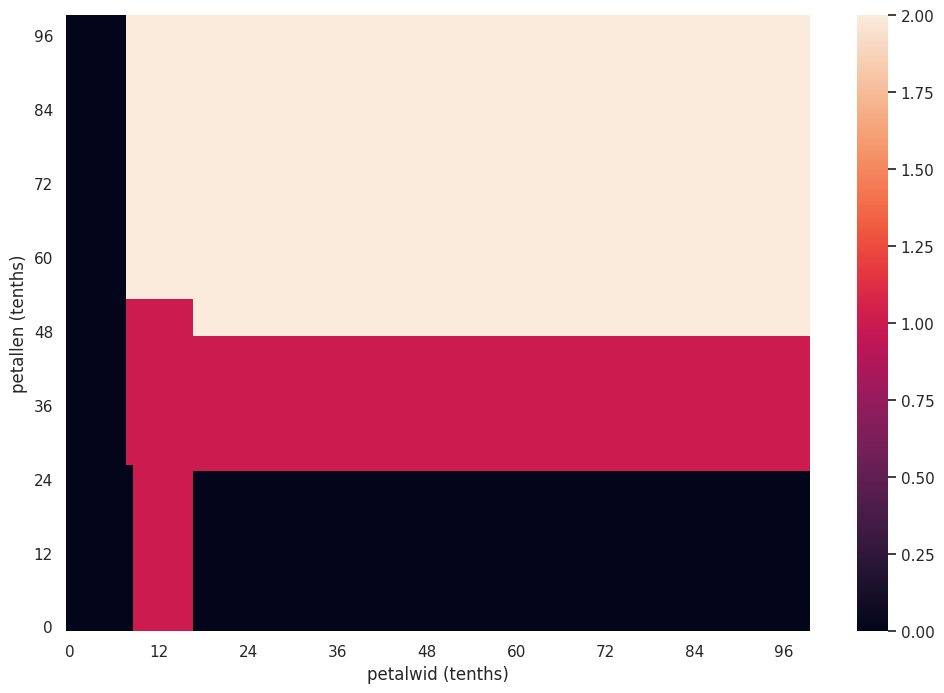

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANEv2)
ax.invert_yaxis()
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

In [ ]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.11828014 0.01776764 0.41272623 0.45122599]

Feature     sepallen has   11.83% of the decision-making importance.
Feature     sepalwid has    1.78% of the decision-making importance.
Feature     petallen has   41.27% of the decision-making importance.
Feature     petalwid has   45.12% of the decision-making importance.


In [ ]:
#
# That's the random-forest model!
# Let's consider ourselves not lost, but found,
#       amid so many trees-and-forests!
#
# In fact, the rest of the hw is to run more DT/RF workflows:
#          Births, Digits, and your choice of Titanic-or-something-else
#
#          If you do have a dataset that's of interest, I suggest use that as the "something else"
#
#          (The Titanic dataset is great, but it was a while ago... :-)
#

### Yay!  

Next up:  Births DT and RF

# DT and RF: **Births** data

Next, you'll do the same thing on the births dataset...


### Suggestion:

Open this notebook twice!

**One window** so that you can go cell-by-cell through the iris-cleaning and iris-modeling cells...

**The second window** is to copy-paste-and-adapt the iris approach to the births data

The approach is identical.

The data-details are different, and that's where the adaptation is necessary and important.

Onward:

These are just placeholders.

You'll copy-and-edit ***lots*** of cells from the iris example.

In [ ]:
#
# a coding cell placeholder
#

# You'll copy lots of cells - mostly coding cells - from the iris example



In [ ]:

import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
filename = 'births_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

births_cleaned.csv : file read into a pandas dataframe.


In [ ]:
print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()  # prints column information

# easiest way to print all rows:   print(df_tidy.to_string())
# or, in table form:
# pd.set_option("display.min_rows",150)  # 10 is default
# pd.set_option("display.max_rows",150)  # 10 is default
# or, the deafult:
df_tidy

df_tidy.shape is (365, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               365 non-null    int64 
 1   day                 365 non-null    int64 
 2   births              365 non-null    int64 
 3   above/below median  365 non-null    object
 4   popularity          365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


month  day  births above/below median  popularity
0        1    1  160369              below           0
1        1    2  169896              below           0
2        1    3  180036              below           0
3        1    4  182854              below           0
4        1    5  184145              below           0
..     ...  ...     ...                ...         ...
360     12   27  194006              above           1
361     12   28  201768              above           1
362     12   29  204806              above           1
363     12   30  206894              above           1
364     12   31  194368              above           1

[365 rows x 5 columns]

In [ ]:
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop( 'births', axis=COLUMN )
df_model1

month  day above/below median  popularity
0        1    1              below           0
1        1    2              below           0
2        1    3              below           0
3        1    4              below           0
4        1    5              below           0
..     ...  ...                ...         ...
360     12   27              above           1
361     12   28              above           1
362     12   29              above           1
363     12   30              above           1
364     12   31              above           1

[365 rows x 4 columns]

In [ ]:
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")




MEDIAN = ['below','above']   # int to str
MEDIAN_INDEX = {'below':0,'above':1}  # str to int

def convert_median(median):


    return MEDIAN_INDEX[median]

# Let's try it out...
for median in MEDIAN:
    print(f"{median} maps to {convert_median(median)}")

COLUMNS is Index(['month', 'day', 'above/below median', 'popularity'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'above/below median': 2, 'popularity': 3}


below maps to 0
above maps to 1


In [ ]:
df_model2 = df_model1.copy()  # copy everything AND...

# add a new column, 'above/below median(num)'
df_model2['above/below median (num)'] = df_model1['above/below median'].apply(convert_median)

# let's see...
df_model2

month  day above/below median  popularity  above/below median (num)
0        1    1              below           0                         0
1        1    2              below           0                         0
2        1    3              below           0                         0
3        1    4              below           0                         0
4        1    5              below           0                         0
..     ...  ...                ...         ...                       ...
360     12   27              above           1                         1
361     12   28              above           1                         1
362     12   29              above           1                         1
363     12   30              above           1                         1
364     12   31              above           1                         1

[365 rows x 5 columns]

In [ ]:
df_model2 = df_model2.drop( 'above/below median', axis=COLUMN )

In [ ]:
df_model2

month  day  popularity  above/below median (num)
0        1    1           0                         0
1        1    2           0                         0
2        1    3           0                         0
3        1    4           0                         0
4        1    5           0                         0
..     ...  ...         ...                       ...
360     12   27           1                         1
361     12   28           1                         1
362     12   29           1                         1
363     12   30           1                         1
364     12   31           1                         1

[365 rows x 4 columns]

In [ ]:
A = df_model2.to_numpy()  # convert to an array
A = A.astype('int64')
print(A)   # make sure it's all floating point
print(A[:5])

[[ 1  1  0  0]
 [ 1  2  0  0]
 [ 1  3  0  0]
 ...
 [12 29  1  1]
 [12 30  1  1]
 [12 31  1  1]]
[[1 1 0 0]
 [1 2 0 0]
 [1 3 0 0]
 [1 4 0 0]
 [1 5 0 0]]


In [ ]:
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 365 rows and 4 cols


In [ ]:
n = 42
print(f"births #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  The {colname} is {value}")

median_index = COL_INDEX['above/below median']
median_num = int(round(A[n][median_index]))
median = MEDIAN[median_num]
print(f"  The median is {median} (i.e., {median_num})")

births #42 is [ 2 12  1  1]
  The month is 2
  The day is 12
  The above/below median is 1
  The popularity is 1
  The median is above (i.e., 1)


In [ ]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:2]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,2]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the median, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1]
X_all (just the median, first few rows) are 
 [[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]


In [ ]:
# we scramble the data, to remove (potential) dependence on its ordering:
#
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels are 
 [1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0]
The corresponding data rows are 
 [[11 17]
 [ 3  4]
 [11  3]
 [ 1 19]
 [ 4  5]]


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 292 rows;  testing with 73 rows

Held-out data... (testing data: 73)
y_test: [1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]

X_test (few rows): [[ 7 13]
 [ 2  3]
 [ 1 16]
 [11  6]
 [ 2 27]]

Data used for modeling... (training data: 292)
y_train: [1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0]

X_train (few rows): [[ 7 31]
 [12  7]
 [ 7 

In [ ]:
# +++ This is the "Model-building and Model-training Cell"
#
# Create a DT model and train it!
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 1


In [ ]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1]
Actual  labels  : [1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]

Results on test set:  58 correct out of 73 total.


In [ ]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {MEDIAN[p]:>12s} {MEDIAN[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :        above above          
row   1 :        below below          
row   2 :        below below          
row   3 :        above below          incorrect
row   4 :        below below          
row   5 :        above above          
row   6 :        below below          
row   7 :        below below          
row   8 :        above above          
row   9 :        below below          
row  10 :        above below          incorrect
row  11 :        below below          
row  12 :        above below          incorrect
row  13 :        below above          incorrect
row  14 :        below below          
row  15 :        above above          
row  16 :        below below          
row  17 :        above above          
row  18 :        above below          incorrect
row  19 :        below below          
row  20 :        below below          
row  21 :        above below          incorrect
row  22 :        below below          
row  23 :        above above          
row  24 : 

58

In [ ]:
print("Model expects", dtree_model.n_features_in_, "features")


Model expects 2 features


In [ ]:
print("COLUMNS:", COLUMNS)
print("COLUMNS[:-1]:", COLUMNS[:-1])
print("Length of COLUMNS[:-1]:", len(COLUMNS[:-1]))


COLUMNS: Index(['month', 'day', 'above/below median', 'popularity'], dtype='object')
COLUMNS[:-1]: Index(['month', 'day', 'above/below median'], dtype='object')
Length of COLUMNS[:-1]: 3


In [ ]:
#
# Now, let's see the tree!
#

filename = 'tree_data1.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-2], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=MEDIAN,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data1.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.498\nsamples = 292\nvalue = [138, 154]\nclass = above", fillcolor="#eaf5fc"] ;
1 [label="gini = 0.224\nsamples = 117\nvalue = [102.0, 15.0]\nclass = below", fillcolor="#e99456"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.327\nsamples = 175\nvalue = [36, 139]\nclass = above", fillcolor="#6cb6ec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


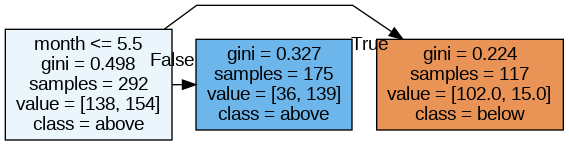

In [ ]:
#
# not as nice-looking, but all-in-one:
#

import pydotplus #pip install pydotplus
from IPython import display

graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("tree1.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell

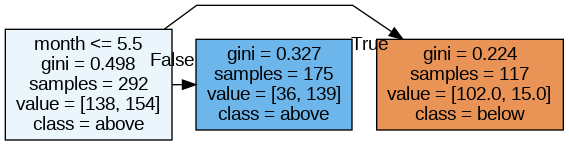

In [ ]:
#
# not as nice-looking, but all-in-one:
#

import pydotplus #pip install pydotplus
from IPython import display

graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("tree1.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell

In [ ]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,6):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d



# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our underfitting/overfitting balance.")

depth:  1  cv accuracy:  0.8251
depth:  2  cv accuracy:  0.8082
depth:  3  cv accuracy:  0.8356
depth:  4  cv accuracy:  0.8081
depth:  5  cv accuracy:  0.7875

best_depth = 3 with acc: 0.8355932203389831 is our underfitting/overfitting balance.


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 3


In [ ]:
#
# Now, let's see the tree!
#

filename = 'tree_data11.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-2], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=MEDIAN,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data11.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.498\nsamples = 292\nvalue = [138, 154]\nclass = above", fillcolor="#eaf5fc"] ;
1 [label="month <= 3.5\ngini = 0.224\nsamples = 117\nvalue = [102.0, 15.0]\nclass = below", fillcolor="#e99456"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="day <= 25.5\ngini = 0.331\nsamples = 67\nvalue = [53, 14]\nclass = below", fillcolor="#eca26d"] ;
1 -> 2 ;
3 [label="gini = 0.375\nsamples = 56\nvalue = [42, 14]\nclass = below", fillcolor="#eeab7b"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = below", fillcolor="#e58139"] ;
2 -> 4 ;
5 [label="day <= 19.5\ngini = 0.039\nsamples = 50\nvalue = [49, 1]\nclass = below", fillcolor="#e6843d"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 30

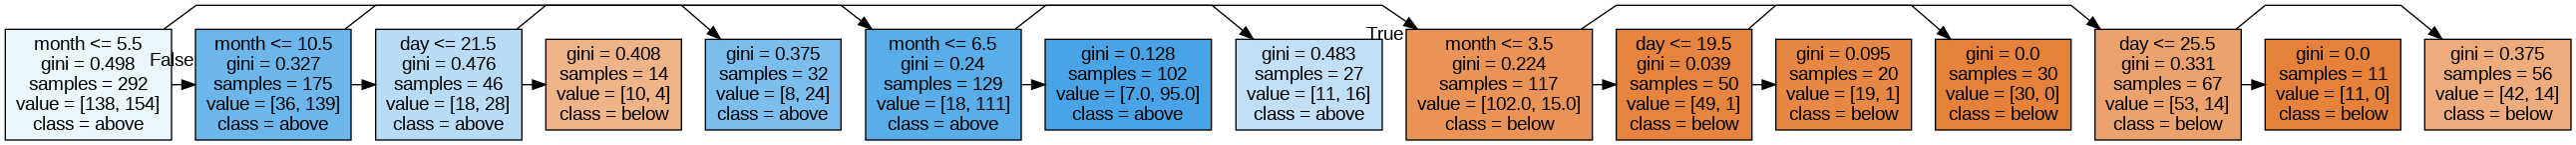

In [ ]:
#
# You will likely have a different name...
#
graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("tree11.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell


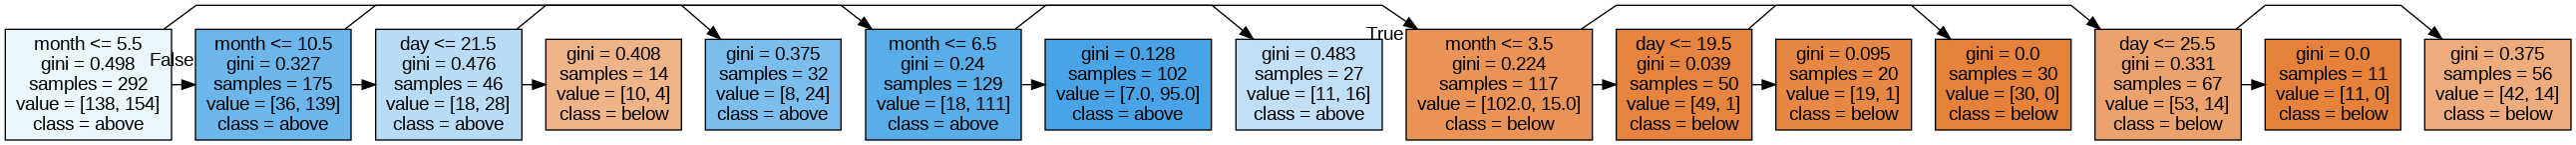

In [ ]:
from IPython import display
display.Image("./tree11.png", width=400)  # adjust for your tree!

In [ ]:
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]
Actual labels: [1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]

row   0 :        above above          
row   1 :        below below          
row   2 :        below below          
row   3 :        above below          incorrect
row   4 :        below below          
row   5 :        above above          
row   6 :        below below          
row   7 :        below below          
row   8 :        above above          
row   9 :        below below          
row  10 :        above below          incorrect
row  11 :        below below          
row  12 :        above below          incorrect
row  13 :        below above          incorrect
row  14 :        below below          
row  15 :        above above          
row  16 

61

In [ ]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth)

Created and trained a 'final' DT classifier with max depth = 3


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):

    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_median = dtree_model_final.predict(our_features)

    predicted_median = int(round(predicted_median[0]))  # unpack one element
    name = MEDIAN[predicted_median]
    #print(f"{name} ({predicted_species})")
    return predicted_median

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [1,11]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} {MEDIAN[result]} from Features {Features}")

I predict 0 below from Features [1, 11]


In [ ]:
#
# try it on new, "unseen" data!
#

LoF = [[1, 1 ],
[2, 27 ],
[3, 7 ],
[4, 10],
[5, 5 ],
[6, 5 ],
[10, 18 ],
[11, 6 ],
[12, 31 ]]


for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

I predict 0 from Features [1, 1]
I predict 0 from Features [2, 27]
I predict 0 from Features [3, 7]
I predict 0 from Features [4, 10]
I predict 0 from Features [5, 5]
I predict 1 from Features [6, 5]
I predict 1 from Features [10, 18]
I predict 1 from Features [11, 6]
I predict 0 from Features [12, 31]


In [ ]:
day = 11
month = 1

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for day in VERTICAL:
  for month in HORIZONT:
    Features = [ day,month]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our below/above median-to-number mapping:
0 - below
1- above


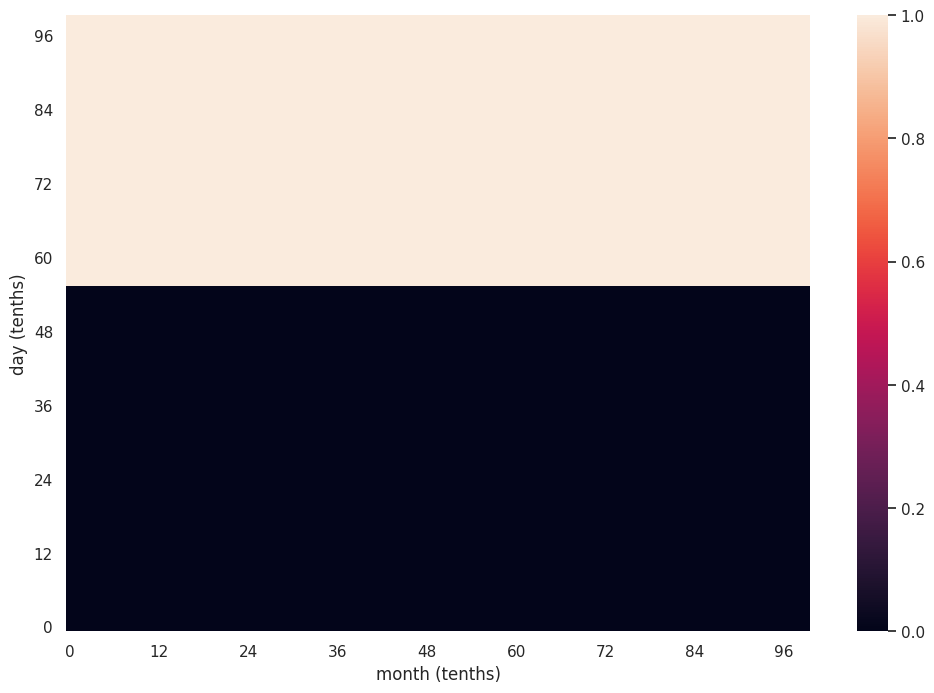

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="month (tenths)", ylabel="day (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
print("Remember our below/above median-to-number mapping:")
print("0 - below")
print("1- above")


In [ ]:
month = 1

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANEv2 = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for day in VERTICAL:
  for month in HORIZONT:
    Features = [ day,month ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANEv2[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANEv2[0:3,0:3]) # small bit of the upper-left corner

..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our below/above median-to-number mapping:
0 - below
1- above


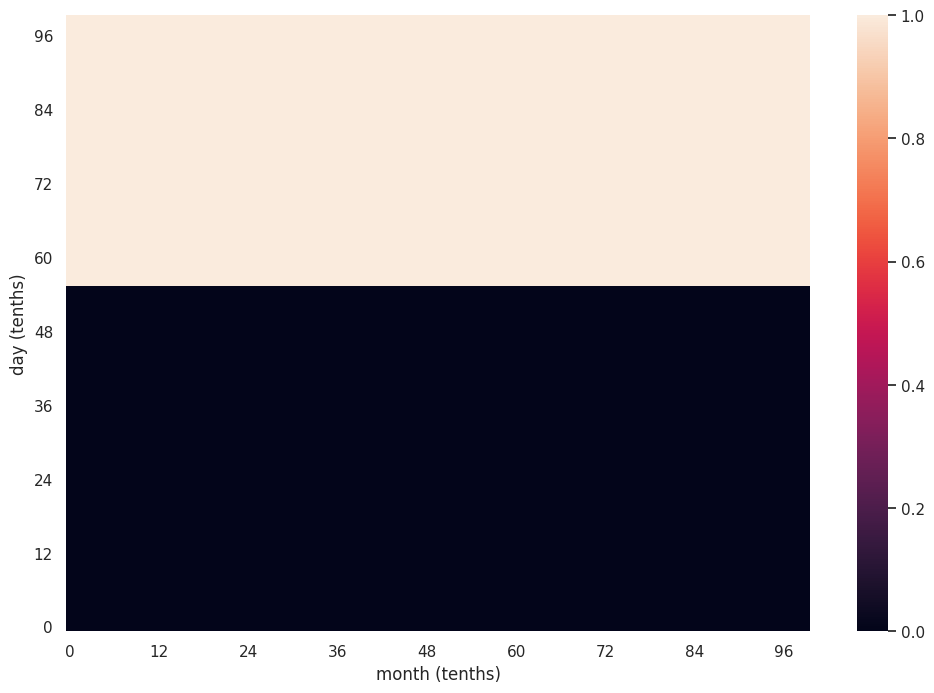

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANEv2)
ax.invert_yaxis()
ax.set(xlabel="month (tenths)", ylabel="day (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our below/above median-to-number mapping:")
print("0 - below")
print("1- above")

In [ ]:

# feature importances!
#
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked
#
# feature importances are often even more "important" than predictions,
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.95108384 0.04891616]

Feature        month has   95.11% of the decision-making importance.
Feature          day has    4.89% of the decision-making importance.


In [ ]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#
# Create a RF model and train it!
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d,
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)
# This max_samples=0.5 is the fraction of rows to use for each DT
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")

Built an RF with depth=1 and number of trees=42


In [ ]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1]
Actual  labels  : [1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]

Results on test set:  58 correct out of 73 total.
row   0 :        above above          
row   1 :        below below          
row   2 :        below below          
row   3 :        above below          incorrect
row   4 :        below below          
row   5 :        above above          
row   6 :        below below          
row   7 :        below below          
row   8 :        above above          
row   9 :        below below          
row  10 :        above below          incorrect
row  11 :        below below          
row  12 :        above below          incorrect
row  13 :        below above          incorrect
row  14 :        below below     

58

In [ ]:
#
# we can get the individual trees, if we want...
#
tree_index = 27   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-2], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=MEDIAN,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=379374585)
file rf_tree_027.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.498\nsamples = 110\nvalue = [69, 77]\nclass = above", fillcolor="#eaf5fc"] ;
1 [label="gini = 0.16\nsamples = 42\nvalue = [52, 5]\nclass = below", fillcolor="#e88d4c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.309\nsamples = 68\nvalue = [17, 72]\nclass = above", fillcolor="#68b4eb"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


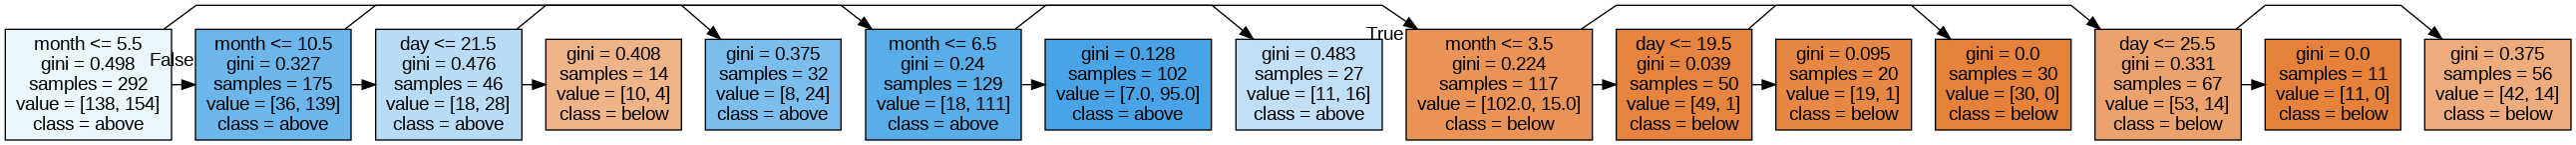

In [ ]:
#
# add locally, to this notebook...
#
graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("rf_tree_27.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell


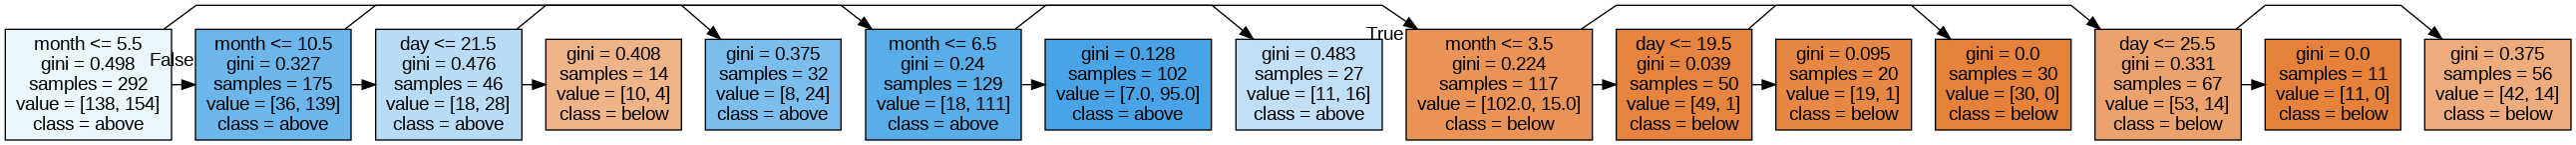

In [ ]:
from IPython import display
display.Image("./rf_tree_27.png", width=900)  # adjust for your treename/size!

In [ ]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d,
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

#
# our task: assign best values by keeping a "running max"
#
best_depth = best_d
best_num_trees = best_ntrees

print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")


depth:  1 ntrees:  50 cv accuracy:  0.8116
depth:  1 ntrees: 150 cv accuracy:  0.8184
depth:  1 ntrees: 250 cv accuracy:  0.8184
depth:  2 ntrees:  50 cv accuracy:  0.8251
depth:  2 ntrees: 150 cv accuracy:  0.8251
depth:  2 ntrees: 250 cv accuracy:  0.8116
depth:  3 ntrees:  50 cv accuracy:  0.8287
depth:  3 ntrees: 150 cv accuracy:  0.8320
depth:  3 ntrees: 250 cv accuracy:  0.8320
depth:  4 ntrees:  50 cv accuracy:  0.8319
depth:  4 ntrees: 150 cv accuracy:  0.8388
depth:  4 ntrees: 250 cv accuracy:  0.8319
depth:  5 ntrees:  50 cv accuracy:  0.8559
depth:  5 ntrees: 150 cv accuracy:  0.8594
depth:  5 ntrees: 250 cv accuracy:  0.8559

best_depth: 5 and best_num_trees: 150 are our choices. Acc: 0.8594389246054938


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=5 and ntrees=150


In [ ]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1]
Actual  labels  : [1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]

Results on test set:  60 correct out of 73 total.
row   0 :        above above          
row   1 :        below below          
row   2 :        below below          
row   3 :        above below          incorrect
row   4 :        below below          
row   5 :        above above          
row   6 :        below below          
row   7 :        below below          
row   8 :        below above          incorrect
row   9 :        below below          
row  10 :        below below          
row  11 :        below below          
row  12 :        above below          incorrect
row  13 :        below above          incorrect
row  14 :        below below     

60

In [ ]:
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=5 and ntrees=150


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):

    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_median = rforest_model_final.predict(our_features)

    predicted_median = int(round(predicted_median[0]))  # unpack one element
    name = MEDIAN[predicted_median]

    return predicted_median

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [1,11]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict 0 from Features [1, 11]


In [ ]:
#
# try it on new, "unseen" data!
#

LoF = [
[1, 1 ],
[2, 27 ],
[3, 7 ],
[4, 10],
[5, 5 ],
[6, 5 ],
[10, 18 ],
[11, 6 ],
[12, 31 ],
]

for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

I predict 0 from Features [1, 1]
I predict 0 from Features [2, 27]
I predict 0 from Features [3, 7]
I predict 0 from Features [4, 10]
I predict 0 from Features [5, 5]
I predict 0 from Features [6, 5]
I predict 1 from Features [10, 18]
I predict 1 from Features [11, 6]
I predict 1 from Features [12, 31]


In [ ]:
day = 27
month = 4

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for day in VERTICAL:
  for month in HORIZONT:
    Features = [ day,month]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our below/above median-to-number mapping:
0 - below
1- above


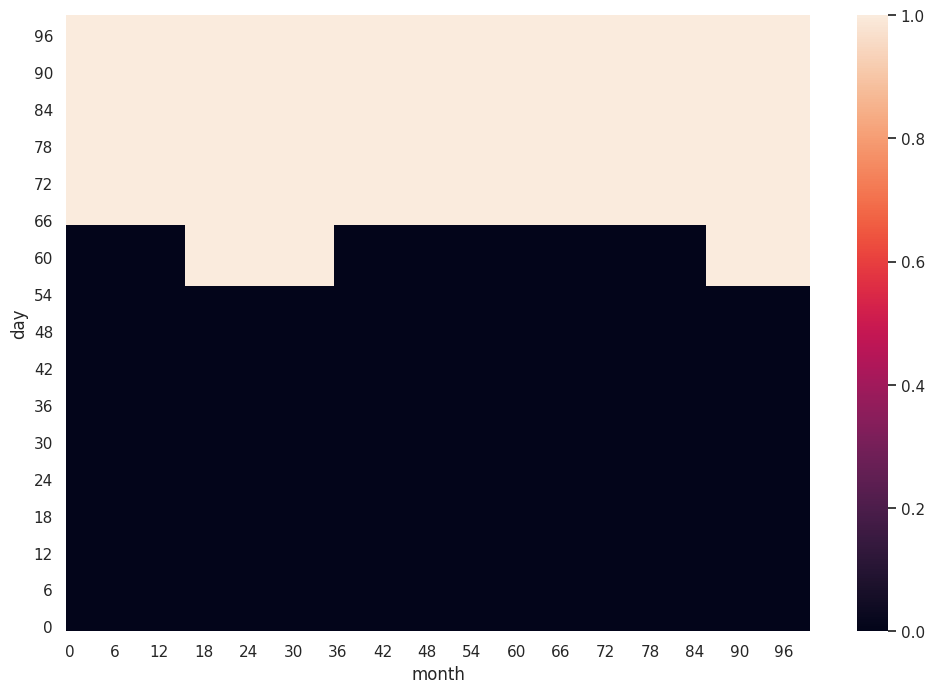

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="month", ylabel="day")
ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(ax.get_yticks()[::2])


print("Remember our below/above median-to-number mapping:")
print("0 - below")
print("1- above")

In [ ]:
day = 1
month = 1

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for day in VERTICAL:
  for month in HORIZONT:
    Features = [ day,month]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our below/above median-to-number mapping:
0 - below
1- above


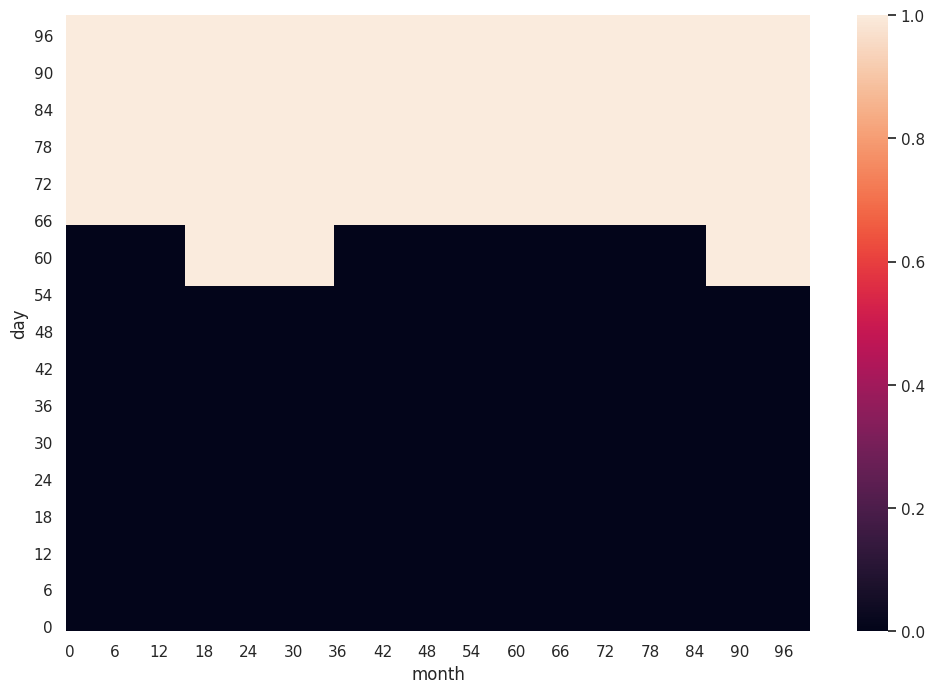

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="month", ylabel="day")
ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(ax.get_yticks()[::2])


print("Remember our below/above median-to-number mapping:")
print("0 - below")
print("1- above")


In [ ]:
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.77045458 0.22954542]

Feature        month has   77.05% of the decision-making importance.
Feature          day has   22.95% of the decision-making importance.


# DT and RF: **Digits** data

Next, you'll do the same thing on the digits dataset...

Same suggestion as before!


Notice that you're getting more and more practice with the "modeling workflow."

It's not an exaggeration to say that this is, in essence, what all ML/modeling efforts look-and-feel like!

<br><br>

a placeholder text cell

In [ ]:
# a placeholder code cell

In [ ]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
filename = 'digits_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

digits_cleaned.csv : file read into a pandas dataframe.


In [ ]:
# different version vary on how to see all rows (adapt to suit your system!)
#
print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()  # prints column information

# easiest way to print all rows:   print(df_tidy.to_string())
# or, in table form:
# pd.set_option("display.min_rows",150)  # 10 is default
# pd.set_option("display.max_rows",150)  # 10 is default
# or, the deafult:
df_tidy

df_tidy.shape is (1768, 65)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19

pix0  pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  ...  pix55  \
0        0     0     9    14     8     1     0     0     0     0  ...      0   
1        0     0    11    12     0     0     0     0     0     2  ...      0   
2        0     0     1     9    15    11     0     0     0     0  ...      0   
3        0     0     0     0    14    13     1     0     0     0  ...      0   
4        0     0     5    12     1     0     0     0     0     0  ...      2   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
1763     0     0     4    10    13     6     0     0     0     1  ...      0   
1764     0     0     6    16    13    11     1     0     0     0  ...      0   
1765     0     0     1    11    15     1     0     0     0     0  ...      0   
1766     0     0     2    10     7     0     0     0     0     0  ...      0   
1767     0     0    10    14     8     1     0     0     0     2  ...      0   

      pix56  pix57  pix58  pix59  pix60  pix61  pix62  pix63  actual_digit  
0         0      0     11     16     15     11      1      0             8  
1         0      0      9     12     13      3      0      0             9  
2         0      0      1     10     13      3      0      0             0  
3         0      0      0      1     13     16      1      0             1  
4         0      0      3     11      8     13     12      4             2  
...     ...    ...    ...    ...    ...    ...    ...    ...           ...  
1763      0      0      2     14     15      9      0      0             9  
1764      0      0      6     16     14      6      0      0             0  
1765      0      0      2      9     13      6      0      0             8  
1766      0      0      5     12     16     12      0      0             9  
1767      0      1      8     12     14     12      1      0             8  

[1768 rows x 65 columns]

In [ ]:
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

ACTUAL_DIGITS = ['0','1','2','3','4','5','6','7','8','9']   # int to str
ACTUAL_DIGITS_INDEX = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}  # str to int

# Let's try it out...
for name in ACTUAL_DIGITS:
    print(f"{name} maps to {ACTUAL_DIGITS_INDEX[name]}")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [ ]:
# let's convert our dataframe to a numpy array, named A
#
A = df_tidy.to_numpy()  # convert to an array
A = A.astype('int64')   # make sure it's all floating point
print(A[:5])  # see the first 5 rows

[[ 0  0  9 14  8  1  0  0  0  0 12 14 14 12  0  0  0  0  9 10  0 15  4  0
   0  0  3 16 12 14  2  0  0  0  4 16 16  2  0  0  0  3 16  8 10 13  2  0
   0  1 15  1  3 16  8  0  0  0 11 16 15 11  1  0  8]
 [ 0  0 11 12  0  0  0  0  0  2 16 16 16 13  0  0  0  3 16 12 10 14  0  0
   0  1 16  1 12 15  0  0  0  0 13 16  9 15  2  0  0  0  0  3  0  9 11  0
   0  0  0  0  9 15  4  0  0  0  9 12 13  3  0  0  9]
 [ 0  0  1  9 15 11  0  0  0  0 11 16  8 14  6  0  0  2 16 10  0  9  9  0
   0  1 16  4  0  8  8  0  0  4 16  4  0  8  8  0  0  1 16  5  1 11  3  0
   0  0 12 12 10 10  0  0  0  0  1 10 13  3  0  0  0]
 [ 0  0  0  0 14 13  1  0  0  0  0  5 16 16  2  0  0  0  0 14 16 12  0  0
   0  1 10 16 16 12  0  0  0  3 12 14 16  9  0  0  0  0  0  5 16 15  0  0
   0  0  0  4 16 14  0  0  0  0  0  1 13 16  1  0  1]
 [ 0  0  5 12  1  0  0  0  0  0 15 14  7  0  0  0  0  0 13  1 12  0  0  0
   0  2 10  0 14  0  0  0  0  0  2  0 16  1  0  0  0  0  0  6 15  0  0  0
   0  0  9 16 15  9  8  2  0  0  3 11  8 13 

In [ ]:
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [ ]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 42
print(f"digits #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

ACTUAL_DIGITS_INDEX = COL_INDEX['actual_digit']
actual_num = int(round(A[n][ACTUAL_DIGITS_INDEX]))
actual = ACTUAL_DIGITS[actual_num]
print(f"  digit is {actual} (i.e., {actual_num})")


digits #42 is [ 0  0  0 10 11  0  0  0  0  0  9 16  6  0  0  0  0  0 15 13  0  0  0  0
  0  0 14 10  0  0  0  0  0  1 15 12  8  2  0  0  0  0 12 16 16 16 10  1
  0  0  7 16 12 12 16  4  0  0  0  9 15 12  5  0  6]
  Its pix0 is 0
  Its pix1 is 0
  Its pix2 is 0
  Its pix3 is 10
  Its pix4 is 11
  Its pix5 is 0
  Its pix6 is 0
  Its pix7 is 0
  Its pix8 is 0
  Its pix9 is 0
  Its pix10 is 9
  Its pix11 is 16
  Its pix12 is 6
  Its pix13 is 0
  Its pix14 is 0
  Its pix15 is 0
  Its pix16 is 0
  Its pix17 is 0
  Its pix18 is 15
  Its pix19 is 13
  Its pix20 is 0
  Its pix21 is 0
  Its pix22 is 0
  Its pix23 is 0
  Its pix24 is 0
  Its pix25 is 0
  Its pix26 is 14
  Its pix27 is 10
  Its pix28 is 0
  Its pix29 is 0
  Its pix30 is 0
  Its pix31 is 0
  Its pix32 is 0
  Its pix33 is 1
  Its pix34 is 15
  Its pix35 is 12
  Its pix36 is 8
  Its pix37 is 2
  Its pix38 is 0
  Its pix39 is 0
  Its pix40 is 0
  Its pix41 is 0
  Its pix42 is 12
  Its pix43 is 16
  Its pix44 is 16
  Its pix45 is 16
  

In [ ]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [8 9 0 ... 8 9 8]
X_all (just the features, first few rows) are 
 [[ 0  0  9 14  8  1  0  0  0  0 12 14 14 12  0  0  0  0  9 10  0 15  4  0
   0  0  3 16 12 14  2  0  0  0  4 16 16  2  0  0  0  3 16  8 10 13  2  0
   0  1 15  1  3 16  8  0  0  0 11 16 15 11  1  0]
 [ 0  0 11 12  0  0  0  0  0  2 16 16 16 13  0  0  0  3 16 12 10 14  0  0
   0  1 16  1 12 15  0  0  0  0 13 16  9 15  2  0  0  0  0  3  0  9 11  0
   0  0  0  0  9 15  4  0  0  0  9 12 13  3  0  0]
 [ 0  0  1  9 15 11  0  0  0  0 11 16  8 14  6  0  0  2 16 10  0  9  9  0
   0  1 16  4  0  8  8  0  0  4 16  4  0  8  8  0  0  1 16  5  1 11  3  0
   0  0 12 12 10 10  0  0  0  0  1 10 13  3  0  0]
 [ 0  0  0  0 14 13  1  0  0  0  0  5 16 16  2  0  0  0  0 14 16 12  0  0
   0  1 10 16 16 12  0  0  0  3 12 14 16  9  0  0  0  0  0  5 16 15  0  0
   0  0  0  4 16 14  0  0  0  0  0  1 13 16  1  0]
 [ 0  0  5 12  1  0  0  0  0  0 15 14  7  0  0  0  0  0 13  1 1

In [ ]:
#
# we scramble the data, to remove (potential) dependence on its ordering:
#
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels are 
 [7 1 9 ... 9 8 5]
The corresponding data rows are 
 [[ 0  0  5 16 12  2  0  0  0  0  4 11 16 10  0  0  0  0  0  0 14 11  0  0
   0  0  2  4 14 14  2  0  0  0 13 16 16 10  4  0  0  0  3 10 14  0  0  0
   0  0  0 15  5  0  0  0  0  0  6 11  0  0  0  0]
 [ 0  0  1  7 10  3  0  0  0  0  8 16 16 12  0  0  0  0  8 16 16 12  0  0
   0  0 10 16 16  5  0  0  0  0  7 16 16  1  0  0  0  0 14 16 15  1  0  0
   0  0 12 16 16  1  0  0  0  0  1  9 12  9  0  0]
 [ 0  0  9 12 13  6  0  0  0  0 16  8  8 15  2  0  0  0 16 10  9 16  5  0
   0  0  4 12 11 12  5  0  0  0  0  0  0  8  8  0  0  0  0  0  0  9  7  0
   0  0  8  4  7 16  2  0  0  0 10 16 16  7  0  0]
 [ 0  0  0  0  5 15  1  0  0  0  0  0 11 16  1  0  0  0  0  8 15 16  3  0
   0  2 13 15  5 16  0  0  0  8 14  2  3 16  0  0  0  0  0  0  4 15  0  0
   0  0  0  0  5 15  0  0  0  0  0  0  5 16  1  0]
 [ 0  0  9 13  6  0  0  0  0  0 14  7 11  3  0  0  0  4  7  8  5  8  0  0
   0  8 10 15 14  9  0  0  0  0  4  7  9 13  1  0  

In [ ]:
# We next separate into test data and training data ...
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [5 0 2 1 9 6 4 5 7 2 6 2 7 5 9 9 4 1 2 3 1 8 5 4 2 2 7 6 6 5 8 9 8 3 4 3 0
 8 7 6 4 4 1 3 1 9 1 9 3 8 5 1 0 6 4 3 2 0 8 3 5 5 8 6 7 4 9 0 9 4 0 7 0 9
 7 8 5 4 0 5 3 4 4 3 6 6 2 3 7 0 2 9 2 4 3 7 8 6 7 8 5 8 2 0 5 0 6 2 4 7 3
 6 1 8 7 4 3 6 3 2 8 7 2 1 1 9 4 3 2 6 3 6 3 9 1 6 2 5 7 5 4 1 1 9 2 1 9 1
 9 6 3 4 4 1 0 0 2 5 3 7 5 2 8 4 0 6 6 7 8 5 9 1 2 6 8 3 3 4 2 2 5 9 3 1 5
 2 5 1 4 3 2 0 0 6 4 9 3 9 4 5 4 3 9 9 3 0 8 0 4 9 1 2 3 8 9 6 2 9 2 2 9 0
 1 2 3 5 4 7 0 6 5 4 7 8 3 5 5 3 0 7 0 3 1 4 4 6 0 9 6 7 6 1 7 3 1 9 9 7 9
 0 8 3 3 2 6 4 3 6 4 8 6 9 0 6 1 5 2 8 6 6 4 9 0 3 7 5 3 6 1 4 9 8 2 4 1 9
 3 0 7 3 5 7 9 9 6 7 9 3 8 2 2 3 3 2 1 9 5 4 7 8 9 5 1 1 9 2 4 8 9 7 6 6 7
 8 8 6 7 7 5 1 7 5 3 7 1 8 4 6 0 4 1 4 8 2]

X_test (few rows): [[ 0  3 10 11 12 12  6  0  0  8 14 11  8  8  4  0  0  8 10  7  3  0  0  0
   0  8 16 14 15  4  0  0  0  2  2  0  6  9  0  0  0  0  0  0  4 12  0  0
   0  1  8  4 10 10

In [ ]:
#
# +++ This is the "Model-building and Model-training Cell"
#
# Create a DT model and train it!
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 1


In [ ]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
Actual  labels  : [5 0 2 1 9 6 4 5 7 2 6 2 7 5 9 9 4 1 2 3 1 8 5 4 2 2 7 6 6 5 8 9 8 3 4 3 0
 8 7 6 4 4 1 3 1 9 1 9 3 8 5 1 0 6 4 3 2 0 8 3 5 5 8 6 7 4 9 0 9 4 0 7 0 9
 7 8 5 4 0 5 3 4 4 3 6 6 2 3 7 0 2 9 2 4 3 7 8 6 7 8 5 8 2 0 5 0 6 2 4 7 3
 6 1 8 7 4 3 6 3 2 8

In [ ]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {ACTUAL_DIGITS[p]:>12s} {ACTUAL_DIGITS[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :            1 5              incorrect
row   1 :            0 0              
row   2 :            1 2              incorrect
row   3 :            1 1              
row   4 :            1 9              incorrect
row   5 :            1 6              incorrect
row   6 :            1 4              incorrect
row   7 :            1 5              incorrect
row   8 :            1 7              incorrect
row   9 :            1 2              incorrect
row  10 :            1 6              incorrect
row  11 :            1 2              incorrect
row  12 :            1 7              incorrect
row  13 :            0 5              incorrect
row  14 :            0 9              incorrect
row  15 :            0 9              incorrect
row  16 :            1 4              incorrect
row  17 :            1 1              
row  18 :            1 2              incorrect
row  19 :            1 3              incorrect
row  20 :            1 1              
row  21 :            1 8    

61

In [ ]:

filename = 'tree_data2.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=ACTUAL_DIGITS,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data2.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [145, 146, 138, 138, 138, 146, 141, 144, 142, 136]\nclass = 1", fillcolor="#ffffff"] ;
1 [label="gini = 0.532\nsamples = 217\nvalue = [141, 0, 3, 1, 5, 21, 3, 0, 2, 41]\nclass = 0", fillcolor="#f0b78e"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.888\nsamples = 1197\nvalue = [4, 146, 135, 137, 133, 125, 138, 144, 140, 95]\nclass = 1", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


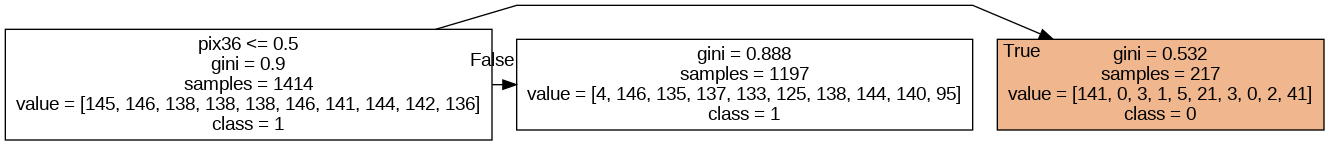

In [ ]:
# not as nice-looking, but all-in-one:
#

import pydotplus #pip install pydotplus
from IPython import display

graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("tree2.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell

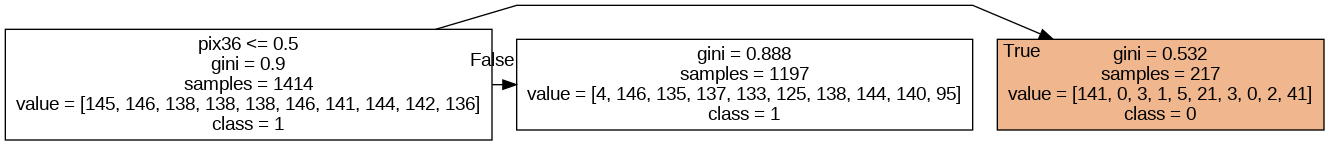

In [ ]:
from IPython import display
display.Image("./tree2.png", width=500)

# if you've displayed this cell's output,
# you don't need to submit the image file:
# even when the file is gone, the notebook keeps
# an internal version of the image,
# which is all that's needed.

In [ ]:
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,6):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d



# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our underfitting/overfitting balance.")

depth:  1  cv accuracy:  0.2030
depth:  2  cv accuracy:  0.3182
depth:  3  cv accuracy:  0.4844
depth:  4  cv accuracy:  0.5679
depth:  5  cv accuracy:  0.6697

best_depth = 5 with acc: 0.6697165626644613 is our underfitting/overfitting balance.


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 5


In [ ]:
#
# Now, let's see the tree!
#

filename = 'tree_data22.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=ACTUAL_DIGITS,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data22.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [145, 146, 138, 138, 138, 146, 141, 144, 142, 136]\nclass = 1", fillcolor="#ffffff"] ;
1 [label="pix28 <= 4.5\ngini = 0.532\nsamples = 217\nvalue = [141, 0, 3, 1, 5, 21, 3, 0, 2, 41]\nclass = 0", fillcolor="#f0b78e"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 0.5\ngini = 0.16\nsamples = 154\nvalue = [141.0, 0.0, 2.0, 0.0, 5.0, 3.0, 1.0, 0.0, 0.0, 2.0]\nclass = 0", fillcolor="#e78c4a"] ;
1 -> 2 ;
3 [label="pix52 <= 14.0\ngini = 0.694\nsamples = 11\nvalue = [1, 0, 1, 0, 5, 3, 1, 0, 0, 0]\nclass = 4", fillcolor="#cef8f0"] ;
2 -> 3 ;
4 [label="pix5 <= 10.0\ngini = 0.667\nsamples = 6\nvalue = [1, 0, 1, 0, 0, 3, 1, 0, 0, 0]\nclass = 5", fillcolor="#b0d8f5"] ;

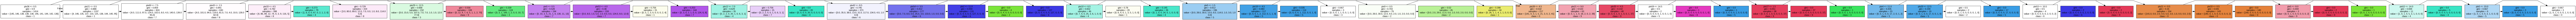

In [ ]:
graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("tree22.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell

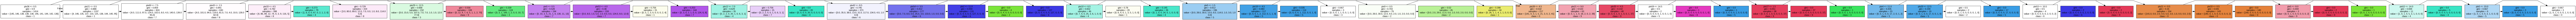

In [ ]:
#
# You will likely have a different name...
#
from IPython import display
display.Image("./tree22.png", width=2000)  # adjust for your tree!

In [ ]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5 0 8 1 3 6 9 5 7 8 1 8 7 5 9 9 4 1 8 3 1 8 5 4 8 2 7 1 0 5 8 9 9 3 4 7 0
 8 8 6 4 8 1 3 8 9 9 3 7 8 5 1 0 6 4 8 1 0 8 3 5 7 8 6 7 4 9 0 8 7 0 8 0 9
 7 3 5 4 0 1 1 4 4 3 6 6 8 3 7 0 7 7 3 4 3 7 8 6 7 8 4 8 7 0 5 0 1 2 4 7 3
 6 8 8 7 4 2 6 3 8 8 7 1 8 9 9 4 8 8 6 3 6 3 9 8 6 8 5 7 5 4 4 8 9 2 8 9 8
 9 6 3 4 8 9 0 0 7 5 3 7 5 8 8 4 0 6 6 7 8 5 9 8 8 6 8 7 8 4 2 8 5 8 8 9 5
 8 5 4 4 3 1 0 0 6 8 8 8 9 4 5 4 3 9 9 3 0 2 0 9 9 1 8 3 8 9 6 4 7 8 8 8 0
 9 8 3 5 4 7 0 6 5 4 7 8 3 5 5 3 0 7 0 3 8 4 4 6 0 9 1 1 6 8 7 3 9 8 9 7 9
 0 8 9 3 8 6 4 3 6 4 8 6 9 0 4 9 5 8 8 0 6 4 9 0 3 7 5 3 6 8 4 9 8 8 4 8 9
 3 0 7 1 5 7 3 9 6 7 9 3 8 8 8 3 3 8 1 9 5 4 2 3 9 5 8 4 9 8 4 2 7 7 6 6 7
 3 8 1 7 7 5 8 7 5 8 7 8 8 4 6 0 4 4 4 3 2]
Actual labels: [5 0 2 1 9 6 4 5 7 2 6 2 7 5 9 9 4 1 2 3 1 8 5 4 2 2 7 6 6 5 8 9 8 3 4 3 0
 8 7 6 4 4 1 3 1 9 1 9 3 8 5 1 0 6 4 3 2 0 8 3 5 5 8 6 7 4 9 0 9 4 0 7 0 9
 7 8 5 4 0 5 3 4 4 3 6 6 2 3 7 0 2 9 2 4 3 7 8 6 7 8 5 8 2 0 5 0 6 2 4 7 3
 6 1 8 7 4 3 6 3 2 8 7 

244

In [ ]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth)

Created and trained a 'final' DT classifier with max depth = 5


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):


    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_digits = dtree_model_final.predict(our_features)

    predicted_digits = int(round(predicted_digits[0]))  # unpack one element
    name = ACTUAL_DIGITS[predicted_digits]
    #print(f"{name} ({predicted_species})")
    return predicted_digits

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [ 0,  0, 10, 11,  0,  0 , 0,  0,  0,  9, 16,  6,  0,  0,  0,  0,  0, 15, 13,  0,  0,  0,  0,
  0,  0, 14, 10,  0,  0,  0,  0,  0,  1, 15, 12,  8,  2,  0,  0,  0,  0, 12, 16, 16, 16, 10,  1,
  0,  0,  7, 16, 12, 12, 16,  4,  0,  0,  0,  9, 15, 12,  5,  0,  6]
result = predictive_model( Features )
print(f"I predict {result} {ACTUAL_DIGITS[result]} from Features {Features}")

I predict 6 6 from Features [0, 0, 10, 11, 0, 0, 0, 0, 0, 9, 16, 6, 0, 0, 0, 0, 0, 15, 13, 0, 0, 0, 0, 0, 0, 14, 10, 0, 0, 0, 0, 0, 1, 15, 12, 8, 2, 0, 0, 0, 0, 12, 16, 16, 16, 10, 1, 0, 0, 7, 16, 12, 12, 16, 4, 0, 0, 0, 9, 15, 12, 5, 0, 6]


In [ ]:
#
# try it on new, "unseen" data!
#

LoF = [[ 0,  0, 10, 11,  0,  0 , 0,  0,  0,  9, 16,  6,  0,  0,  0,  0,  0, 15, 13,  0,  0,  0,  0,
  0,  0, 14, 10,  0,  0,  0,  0,  0,  1, 15, 12,  8,  2,  0,  0,  0,  0, 12, 16, 16, 16, 10,  1,
  0,  0,  7, 16, 12, 12, 16,  4,  0,  0,  0,  9, 15, 12,  5,  0,  6],
[ 0, 11, 12, 0, 0, 0, 0, 0, 2, 16, 16, 16, 13, 0, 0, 0, 3, 16, 12, 10, 14, 0, 0, 0, 1, 16, 1, 12, 15, 0, 0, 0, 0, 13, 16, 9, 15, 2, 0, 0, 0, 0, 3, 0, 9, 11, 0, 0, 0, 0, 0, 9, 15, 4, 0, 0, 0, 9, 12, 13, 3, 0, 0, 9],
[ 0, 1, 9, 15, 11, 0, 0, 0, 0, 11, 16, 8, 14, 6, 0, 0, 2, 16, 10, 0, 9, 9, 0, 0, 1, 16, 4, 0, 8, 8, 0, 0, 4, 16, 4, 0, 8, 8, 0, 0, 1, 16, 5, 1, 11, 3, 0, 0, 0, 12, 12, 10, 10, 0, 0, 0, 0, 1, 10, 13, 3, 0, 0, 0],
[ 0, 6,  12,  0,  1,  1,  1,  0, 12, 13,  8,  1,  1,  1,  0,  1, 12,  11, 10,  1,  1,  1,  1,  3, 8,  1, 14,  0,  0,  0,  0,  0,  2,  0, 16,  1,  0,  0,  0,  0,  0,  6, 15,  0,  0,  0, 0,  0,  9, 16, 15,  9,  8,  2,  0,  0,  0, 1,  1, 13, 1,  1,  2, 1],
[ 5, 12,  1,  0,  0,  0,  0,  0, 15, 14,  7,  0,  0,  0,  0,  0, 13,  1, 12,  0,  0,  0,  0,  2, 10,  0, 14,  0,  0,  0,  0,  0,  2,  0, 16,  1,  0,  0,  0,  0,  0,  6, 15,  0,  0,  0, 0,  0,  9, 16, 15,  9,  8,  2,  0,  0,  3, 11,  8, 13, 12,  4,  2,0]]

for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")


I predict 6 from Features [0, 0, 10, 11, 0, 0, 0, 0, 0, 9, 16, 6, 0, 0, 0, 0, 0, 15, 13, 0, 0, 0, 0, 0, 0, 14, 10, 0, 0, 0, 0, 0, 1, 15, 12, 8, 2, 0, 0, 0, 0, 12, 16, 16, 16, 10, 1, 0, 0, 7, 16, 12, 12, 16, 4, 0, 0, 0, 9, 15, 12, 5, 0, 6]
I predict 2 from Features [0, 11, 12, 0, 0, 0, 0, 0, 2, 16, 16, 16, 13, 0, 0, 0, 3, 16, 12, 10, 14, 0, 0, 0, 1, 16, 1, 12, 15, 0, 0, 0, 0, 13, 16, 9, 15, 2, 0, 0, 0, 0, 3, 0, 9, 11, 0, 0, 0, 0, 0, 9, 15, 4, 0, 0, 0, 9, 12, 13, 3, 0, 0, 9]
I predict 7 from Features [0, 1, 9, 15, 11, 0, 0, 0, 0, 11, 16, 8, 14, 6, 0, 0, 2, 16, 10, 0, 9, 9, 0, 0, 1, 16, 4, 0, 8, 8, 0, 0, 4, 16, 4, 0, 8, 8, 0, 0, 1, 16, 5, 1, 11, 3, 0, 0, 0, 12, 12, 10, 10, 0, 0, 0, 0, 1, 10, 13, 3, 0, 0, 0]
I predict 6 from Features [0, 6, 12, 0, 1, 1, 1, 0, 12, 13, 8, 1, 1, 1, 0, 1, 12, 11, 10, 1, 1, 1, 1, 3, 8, 1, 14, 0, 0, 0, 0, 0, 2, 0, 16, 1, 0, 0, 0, 0, 0, 6, 15, 0, 0, 0, 0, 0, 9, 16, 15, 9, 8, 2, 0, 0, 0, 1, 1, 13, 1, 1, 2, 1]
I predict 5 from Features [5, 12, 1, 0, 0, 0, 0, 0, 15,

In [ ]:
pix2 = 1
pix3 = 0

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for pix0 in VERTICAL:
  for pix1 in HORIZONT:
    Features = [ 0,  0, 10, 11,  0,  0 , 0,  0,  0,  9, 16,  6,  0,  0,  0,  0,  0, 15, 13,  0,  0,  0,  0,
  0,  0, 14, 10,  0,  0,  0,  0,  0,  1, 15, 12,  8,  2,  0,  0,  0,  0, 12, 16, 16, 16, 10,  1,
  0,  0,  7, 16, 12, 12, 16,  4,  0,  0,  0,  9, 15, 12,  5,  0,  6]

    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
..........................................
................
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]


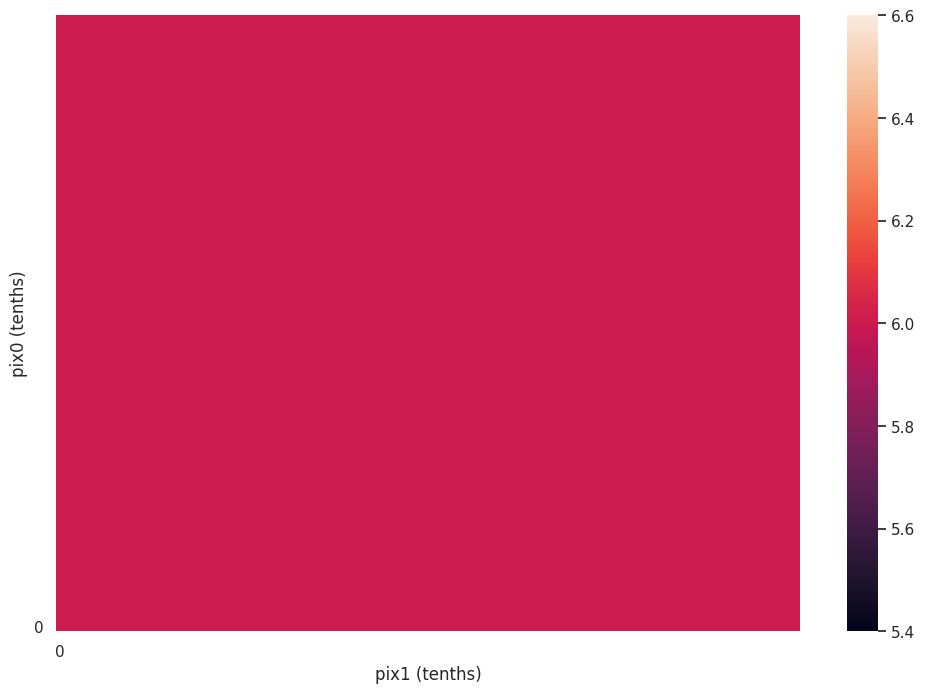

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="pix1 (tenths)", ylabel="pix0 (tenths)")
ax.set_xticks(ax.get_xticks()[::64])
ax.set_yticks(ax.get_yticks()[::64])

In [ ]:
pix2 = 0
pix3 = 0

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for pix0 in VERTICAL:
  for pix1 in HORIZONT:
    Features = [ 0,  0, 10, 11,  0,  0 , 0,  0,  0,  9, 16,  6,  0,  0,  0,  0,  0, 15, 13,  0,  0,  0,  0,
  0,  0, 14, 10,  0,  0,  0,  0,  0,  1, 15, 12,  8,  2,  0,  0,  0,  0, 12, 16, 16, 16, 10,  1,
  0,  0,  7, 16, 12, 12, 16,  4,  0,  0,  0,  9, 15, 12,  5,  0,  6]

    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
..........................................
................
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]


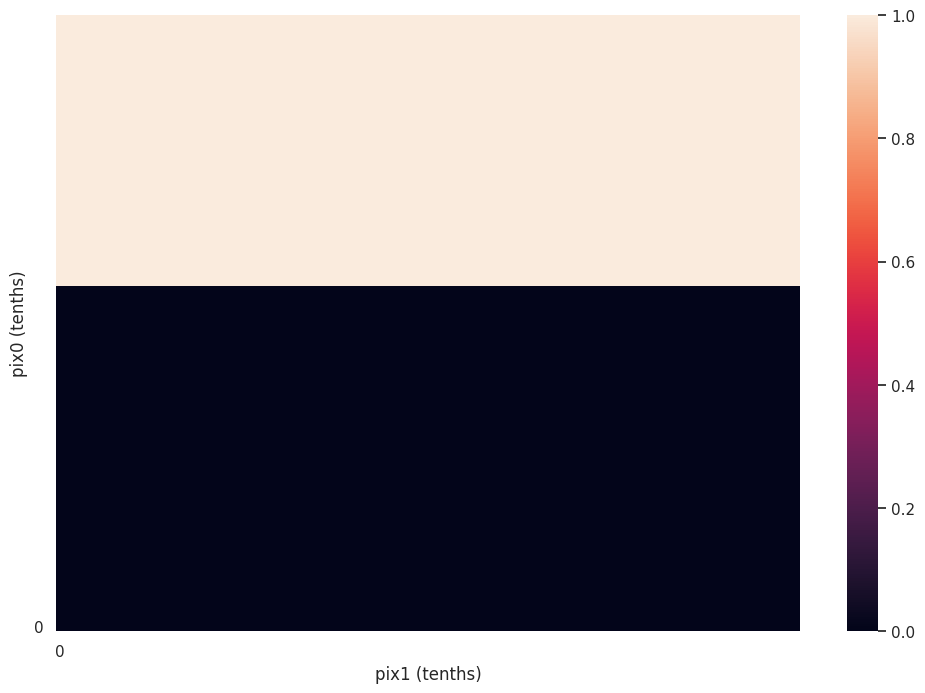

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANEv2)
ax.invert_yaxis()
ax.set(xlabel="pix1 (tenths)", ylabel="pix0 (tenths)")
ax.set_xticks(ax.get_xticks()[::64])
ax.set_yticks(ax.get_yticks()[::64])

In [ ]:
# feature importances!
#
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked
#
# feature importances are often even more "important" than predictions,
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.         0.01799117 0.         0.         0.10062562
 0.0223101  0.         0.         0.00207307 0.01061056 0.
 0.01412582 0.03378318 0.00105573 0.         0.         0.
 0.01044967 0.02207285 0.         0.12167573 0.         0.
 0.         0.         0.00285048 0.         0.00484082 0.
 0.         0.         0.         0.16540719 0.         0.
 0.11868316 0.         0.         0.         0.         0.
 0.11228146 0.08580669 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01651018
 0.03789607 0.         0.         0.         0.         0.00281529
 0.09613516 0.         0.         0.        ]

Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.00% of the decision-making importance.
Feature         pix2 has    1.80% of the decision-making importance.
Feature         pix3 has    0.00% of the decision-making importance.
Feature         pix4 has    0.00% of the decision-making import

In [ ]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#
# Create a RF model and train it!
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d,
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)
# This max_samples=0.5 is the fraction of rows to use for each DT
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")

Built an RF with depth=1 and number of trees=42


In [ ]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5 0 3 2 9 6 4 5 7 2 6 2 7 7 9 9 7 5 2 3 3 8 5 4 2 6 7 6 6 5 8 7 8 3 4 7 0
 8 7 6 4 4 6 3 8 3 3 9 7 8 5 3 0 6 4 7 2 0 8 3 5 7 8 6 7 4 9 0 9 7 0 7 0 3
 7 8 5 4 0 7 3 4 0 3 6 6 3 3 7 0 7 7 3 4 3 7 8 6 7 2 0 8 2 0 5 0 6 2 4 7 3
 6 1 8 7 0 5 6 3 3 8 7 2 8 1 9 4 1 2 6 3 6 3 9 8 6 2 5 7 5 4 1 8 3 6 1 9 8
 3 6 3 4 4 3 0 0 2 5 3 7 5 6 8 0 0 6 6 7 8 5 9 1 8 6 8 7 3 4 2 2 7 3 3 1 5
 2 7 4 4 3 2 0 0 6 1 9 8 3 4 5 4 3 9 9 3 0 5 0 4 9 5 3 3 8 9 6 6 7 2 2 9 0
 9 8 3 5 4 7 0 6 5 4 7 8 3 5 5 3 0 7 0 3 7 7 4 6 0 3 6 7 6 1 7 3 3 9 9 7 3
 0 8 3 3 2 6 4 3 6 4 8 6 1 0 6 3 5 2 8 6 6 0 3 0 3 7 5 3 6 9 4 9 8 2 4 4 9
 3 0 7 3 5 7 9 1 6 7 9 3 8 3 3 3 3 2 5 9 5 4 7 3 3 5 1 6 9 2 0 6 7 7 6 6 7
 3 8 6 7 7 7 8 7 7 3 7 8 8 0 6 0 6 1 0 8 2]
Actual  labels  : [5 0 2 1 9 6 4 5 7 2 6 2 7 5 9 9 4 1 2 3 1 8 5 4 2 2 7 6 6 5 8 9 8 3 4 3 0
 8 7 6 4 4 1 3 1 9 1 9 3 8 5 1 0 6 4 3 2 0 8 3 5 5 8 6 7 4 9 0 9 4 0 7 0 9
 7 8 5 4 0 5 3 4 4 3 6 6 2 3 7 0 2 9 2 4 3 7 8 6 7 8 5 8 2 0 5 0 6 2 4 7 3
 6 1 8 7 4 3 6 3 2 8

268

In [ ]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=ACTUAL_DIGITS,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                       random_state=1881875444)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix21 <= 0.5\ngini = 0.899\nsamples = 547\nvalue = [73.0, 79.0, 71.0, 66.0, 66.0, 68.0, 81.0, 59.0, 72.0\n72.0]\nclass = 6", fillcolor="#fefeff"] ;
1 [label="gini = 0.735\nsamples = 160\nvalue = [0.0, 16.0, 24.0, 8.0, 15.0, 61.0, 80.0, 2.0, 0.0\n0.0]\nclass = 6", fillcolor="#e5e5fc"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.876\nsamples = 387\nvalue = [73.0, 63.0, 47.0, 58.0, 51.0, 7.0, 1.0, 57.0, 72.0\n72.0]\nclass = 0", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


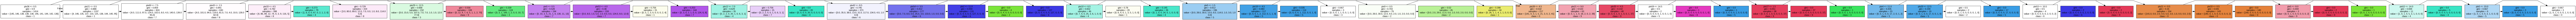

In [ ]:
from IPython import display

graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("rf_tree_28.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell

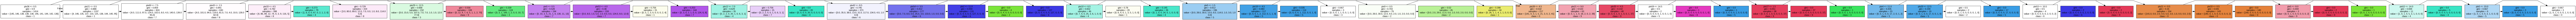

In [ ]:

from IPython import display
display.Image("./rf_tree_28.png", width=800)  # adjust for your treename/size!

In [ ]:
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d,
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

#
# our task: assign best values by keeping a "running max"
#
best_depth = best_d
best_num_trees = best_ntrees

print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.6945
depth:  1 ntrees: 150 cv accuracy:  0.7404
depth:  1 ntrees: 250 cv accuracy:  0.7376
depth:  2 ntrees:  50 cv accuracy:  0.8126
depth:  2 ntrees: 150 cv accuracy:  0.8380
depth:  2 ntrees: 250 cv accuracy:  0.8479
depth:  3 ntrees:  50 cv accuracy:  0.8755
depth:  3 ntrees: 150 cv accuracy:  0.8833
depth:  3 ntrees: 250 cv accuracy:  0.8840
depth:  4 ntrees:  50 cv accuracy:  0.9066
depth:  4 ntrees: 150 cv accuracy:  0.9165
depth:  4 ntrees: 250 cv accuracy:  0.9215
depth:  5 ntrees:  50 cv accuracy:  0.9229
depth:  5 ntrees: 150 cv accuracy:  0.9427
depth:  5 ntrees: 250 cv accuracy:  0.9392

best_depth: 5 and best_num_trees: 150 are our choices. Acc: 0.9427210986642608


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=5 and ntrees=150


In [ ]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5 0 2 1 8 6 4 5 7 2 6 2 7 5 9 9 4 1 2 3 1 8 5 4 2 2 7 6 6 5 8 9 8 3 4 3 0
 8 7 6 4 4 1 3 1 9 9 9 7 8 5 1 0 6 4 8 2 0 1 3 5 8 8 6 7 4 9 0 9 4 0 7 0 9
 7 8 5 4 0 5 3 4 4 3 6 6 2 3 7 0 2 7 3 4 3 7 8 6 7 8 5 8 2 0 5 0 6 2 4 7 3
 6 1 8 7 4 3 6 3 2 1 7 2 1 1 9 4 8 2 6 3 6 3 9 1 6 2 5 7 5 4 1 1 9 2 1 9 1
 9 6 3 4 4 1 0 0 2 5 3 7 5 2 8 4 0 6 6 7 1 5 9 1 2 6 8 8 3 4 2 2 5 9 3 1 5
 2 5 1 4 3 2 0 0 6 4 9 8 9 4 5 4 3 9 9 3 0 5 0 4 9 1 2 3 8 9 6 2 7 2 2 9 0
 9 2 3 5 4 7 0 6 5 4 7 8 3 5 5 3 0 7 0 3 1 4 4 6 0 9 6 7 6 1 7 3 1 9 9 7 9
 0 8 3 3 2 6 4 3 6 4 8 6 9 0 1 1 5 2 8 6 6 4 9 0 3 7 5 3 6 1 4 9 8 2 4 1 9
 3 0 7 3 5 7 9 9 6 7 9 3 8 2 2 3 3 2 1 9 5 4 7 3 9 5 1 1 9 2 4 6 7 7 6 6 7
 8 8 6 7 7 5 1 7 5 3 7 1 8 4 6 0 4 1 4 8 2]
Actual  labels  : [5 0 2 1 9 6 4 5 7 2 6 2 7 5 9 9 4 1 2 3 1 8 5 4 2 2 7 6 6 5 8 9 8 3 4 3 0
 8 7 6 4 4 1 3 1 9 1 9 3 8 5 1 0 6 4 3 2 0 8 3 5 5 8 6 7 4 9 0 9 4 0 7 0 9
 7 8 5 4 0 5 3 4 4 3 6 6 2 3 7 0 2 9 2 4 3 7 8 6 7 8 5 8 2 0 5 0 6 2 4 7 3
 6 1 8 7 4 3 6 3 2 8

334

In [ ]:

from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests


rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)


rforest_model_final.fit(X_all, y_all)
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=5 and ntrees=150


In [ ]:
def predictive_model( Features ):

    our_features = np.asarray([Features])
    predicted_digits = rforest_model_final.predict(our_features)

    predicted_digits = int(round(predicted_digits[0]))
    name = ACTUAL_DIGITS[predicted_digits]
    return predicted_digits

Features = [ 0,  0, 10, 11,  0,  0 , 0,  0,  0,  9, 16,  6,  0,  0,  0,  0,  0, 15, 13,  0,  0,  0,  0,
  0,  0, 14, 10,  0,  0,  0,  0,  0,  1, 15, 12,  8,  2,  0,  0,  0,  0, 12, 16, 16, 16, 10,  1,
  0,  0,  7, 16, 12, 12, 16,  4,  0,  0,  0,  9, 15, 12,  5,  0,  6]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict 6 from Features [0, 0, 10, 11, 0, 0, 0, 0, 0, 9, 16, 6, 0, 0, 0, 0, 0, 15, 13, 0, 0, 0, 0, 0, 0, 14, 10, 0, 0, 0, 0, 0, 1, 15, 12, 8, 2, 0, 0, 0, 0, 12, 16, 16, 16, 10, 1, 0, 0, 7, 16, 12, 12, 16, 4, 0, 0, 0, 9, 15, 12, 5, 0, 6]


In [ ]:
LoF = [[ 0,  0, 10, 11,  0,  0 , 0,  0,  0,  9, 16,  6,  0,  0,  0,  0,  0, 15, 13,  0,  0,  0,  0,
  0,  0, 14, 10,  0,  0,  0,  0,  0,  1, 15, 12,  8,  2,  0,  0,  0,  0, 12, 16, 16, 16, 10,  1,
  0,  0,  7, 16, 12, 12, 16,  4,  0,  0,  0,  9, 15, 12,  5,  0,  6],
[ 0, 11, 12, 0, 0, 0, 0, 0, 2, 16, 16, 16, 13, 0, 0, 0, 3, 16, 12, 10, 14, 0, 0, 0, 1, 16, 1, 12, 15, 0, 0, 0, 0, 13, 16, 9, 15, 2, 0, 0, 0, 0, 3, 0, 9, 11, 0, 0, 0, 0, 0, 9, 15, 4, 0, 0, 0, 9, 12, 13, 3, 0, 0, 9],
[ 0, 1, 9, 15, 11, 0, 0, 0, 0, 11, 16, 8, 14, 6, 0, 0, 2, 16, 10, 0, 9, 9, 0, 0, 1, 16, 4, 0, 8, 8, 0, 0, 4, 16, 4, 0, 8, 8, 0, 0, 1, 16, 5, 1, 11, 3, 0, 0, 0, 12, 12, 10, 10, 0, 0, 0, 0, 1, 10, 13, 3, 0, 0, 0],
[ 0, 6,  12,  0,  1,  1,  1,  0, 12, 13,  8,  1,  1,  1,  0,  1, 12,  11, 10,  1,  1,  1,  1,  3, 8,  1, 14,  0,  0,  0,  0,  0,  2,  0, 16,  1,  0,  0,  0,  0,  0,  6, 15,  0,  0,  0, 0,  0,  9, 16, 15,  9,  8,  2,  0,  0,  0, 1,  1, 13, 1,  1,  2, 1],
[ 5, 12,  1,  0,  0,  0,  0,  0, 15, 14,  7,  0,  0,  0,  0,  0, 13,  1, 12,  0,  0,  0,  0,  2, 10,  0, 14,  0,  0,  0,  0,  0,  2,  0, 16,  1,  0,  0,  0,  0,  0,  6, 15,  0,  0,  0, 0,  0,  9, 16, 15,  9,  8,  2,  0,  0,  3, 11,  8, 13, 12,  4,  2,0]]

for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

I predict 6 from Features [0, 0, 10, 11, 0, 0, 0, 0, 0, 9, 16, 6, 0, 0, 0, 0, 0, 15, 13, 0, 0, 0, 0, 0, 0, 14, 10, 0, 0, 0, 0, 0, 1, 15, 12, 8, 2, 0, 0, 0, 0, 12, 16, 16, 16, 10, 1, 0, 0, 7, 16, 12, 12, 16, 4, 0, 0, 0, 9, 15, 12, 5, 0, 6]
I predict 5 from Features [0, 11, 12, 0, 0, 0, 0, 0, 2, 16, 16, 16, 13, 0, 0, 0, 3, 16, 12, 10, 14, 0, 0, 0, 1, 16, 1, 12, 15, 0, 0, 0, 0, 13, 16, 9, 15, 2, 0, 0, 0, 0, 3, 0, 9, 11, 0, 0, 0, 0, 0, 9, 15, 4, 0, 0, 0, 9, 12, 13, 3, 0, 0, 9]
I predict 7 from Features [0, 1, 9, 15, 11, 0, 0, 0, 0, 11, 16, 8, 14, 6, 0, 0, 2, 16, 10, 0, 9, 9, 0, 0, 1, 16, 4, 0, 8, 8, 0, 0, 4, 16, 4, 0, 8, 8, 0, 0, 1, 16, 5, 1, 11, 3, 0, 0, 0, 12, 12, 10, 10, 0, 0, 0, 0, 1, 10, 13, 3, 0, 0, 0]
I predict 5 from Features [0, 6, 12, 0, 1, 1, 1, 0, 12, 13, 8, 1, 1, 1, 0, 1, 12, 11, 10, 1, 1, 1, 1, 3, 8, 1, 14, 0, 0, 0, 0, 0, 2, 0, 16, 1, 0, 0, 0, 0, 0, 6, 15, 0, 0, 0, 0, 0, 9, 16, 15, 9, 8, 2, 0, 0, 0, 1, 1, 13, 1, 1, 2, 1]
I predict 6 from Features [5, 12, 1, 0, 0, 0, 0, 0, 15,

In [ ]:
pix2 = 0
pix3 = 1

VERTICAL = np.arange(0,10,.1)
HORIZONT = np.arange(0,10,.1)
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) )

row = 0
col = 0
for pix0 in VERTICAL:
  for pix1 in HORIZONT:
    Features = [ 0,  0, 10, 11,  0,  0 , 0,  0,  0,  9, 16,  6,  0,  0,  0,  0,  0, 15, 13,  0,  0,  0,  0,
  0,  0, 14, 10,  0,  0,  0,  0,  0,  1, 15, 12,  8,  2,  0,  0,  0,  0, 12, 16, 16, 16, 10,  1,
  0,  0,  7, 16, 12, 12, 16,  4,  0,  0,  0,  9, 15, 12,  5,  0,  6]

    output = predictive_model(Features)
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")
  if row % 42 == 0: print()

print("\n", PLANE[0:3,0:3])

..........................................
..........................................
................
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]


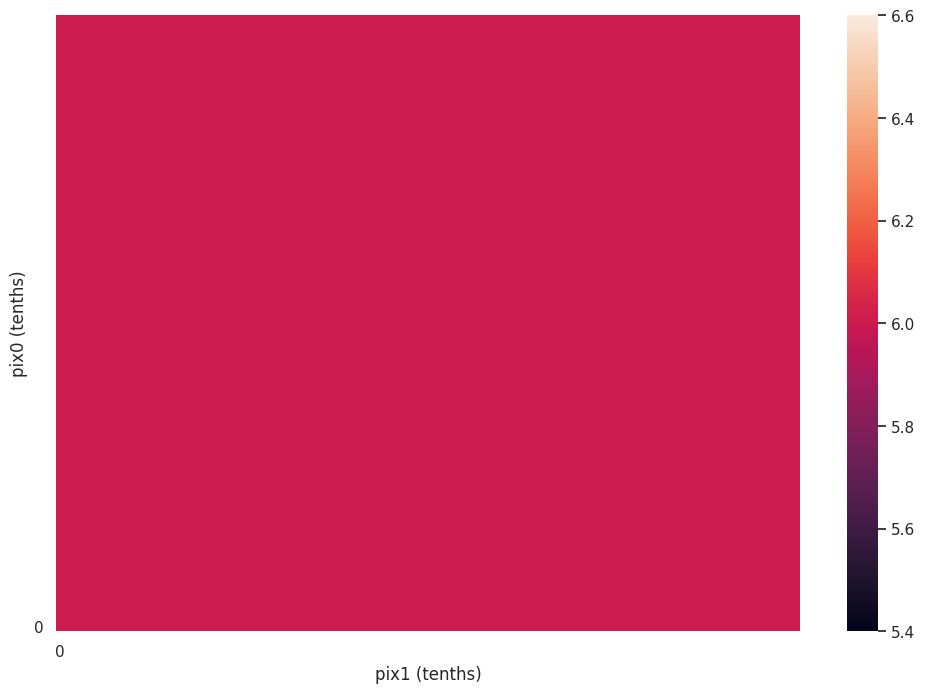

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.heatmap(PLANE)
ax.invert_yaxis()
ax.set(xlabel="pix1 (tenths)", ylabel="pix0 (tenths)")
ax.set_xticks(ax.get_xticks()[::64])
ax.set_yticks(ax.get_yticks()[::64])

In [ ]:
pix2 = 0
pix3 = 0

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) )

row = 0
col = 0
for pix0 in VERTICAL:
  for pix1 in HORIZONT:
    Features = [ 0,  0, 10, 11,  0,  0 , 0,  0,  0,  9, 16,  6,  0,  0,  0,  0,  0, 15, 13,  0,  0,  0,  0,
  0,  0, 14, 10,  0,  0,  0,  0,  0,  1, 15, 12,  8,  2,  0,  0,  0,  0, 12, 16, 16, 16, 10,  1,
  0,  0,  7, 16, 12, 12, 16,  4,  0,  0,  0,  9, 15, 12,  5,  0,  6]

    output = predictive_model(Features)
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")
  if row % 42 == 0: print()

print("\n", PLANE[0:3,0:3])

..........................................
..........................................
................
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]


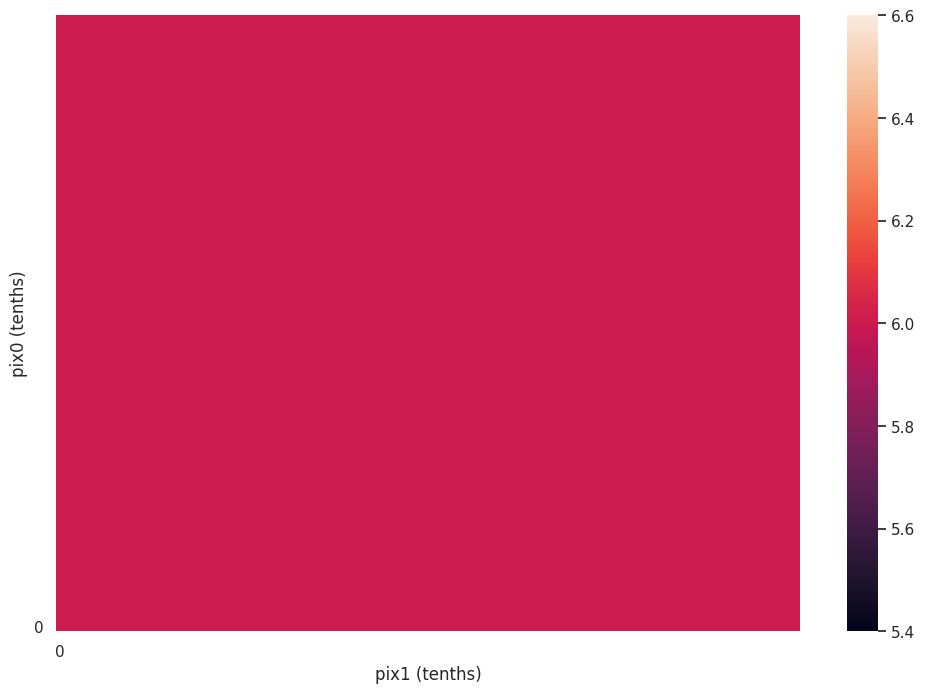

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="pix1 (tenths)", ylabel="pix0 (tenths)")
ax.set_xticks(ax.get_xticks()[::64])
ax.set_yticks(ax.get_yticks()[::64])

In [ ]:
print(rforest_model_final.feature_importances_)
print()

IMPs = rforest_model_final.feature_importances_

for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.00000000e+00 1.29093815e-03 1.99596240e-02 5.13864285e-03
 3.98819593e-03 1.55697392e-02 8.07531623e-03 9.19463999e-05
 0.00000000e+00 8.06587461e-03 3.07115650e-02 2.62886158e-03
 1.21484313e-02 3.04765434e-02 3.19102519e-03 7.54177908e-05
 6.12491340e-05 5.67132425e-03 1.33694869e-02 2.15599441e-02
 2.56984505e-02 5.37356364e-02 6.21761572e-03 2.01850622e-04
 4.04695424e-05 1.01654630e-02 5.00530361e-02 1.86964328e-02
 3.65048534e-02 2.36111203e-02 3.58761010e-02 0.00000000e+00
 0.00000000e+00 4.45827269e-02 2.73342423e-02 1.76042021e-02
 5.26311692e-02 1.93713479e-02 2.76244027e-02 0.00000000e+00
 0.00000000e+00 1.32592346e-02 3.90562728e-02 5.31403229e-02
 2.41674558e-02 1.40847952e-02 2.08044071e-02 0.00000000e+00
 6.18310837e-05 8.51204471e-04 1.33457620e-02 1.27944040e-02
 8.48509873e-03 2.52147767e-02 3.14495360e-02 4.41595844e-04
 0.00000000e+00 1.16272926e-03 2.25279069e-02 4.90868192e-03
 3.33265722e-02 2.75594348e-02 2.00975810e-02 1.23715025e-03]

Feature         pix0 h

# **Next week**: Titanic or _your-own-data_

Not required for this week -- but for _next_ week, IST341 will be narrowing project ideas.

One of those possibilities is to choose a dataset of your own (or use the Titanic / housing dataset) and
+ be sure it's cleaned up to the point where it's "tidy"
+ the cleaning can be done in Excel/spreadsheets instead of Python, for sure
+ or, the cleaning can be done in Python -- up to you!
+ Then, model your dataset with DTs and RFs, just as above
+ and, use Neural Nets (which we will feature next week...)

To gain additional insight, you'll find and show the _feature importances_ for your features in your dataset...

Often, these are what generate the most value, because
+ you want to know what features have the most impact
+ you want to know the relative strengths of the features
+ you're waiting for future data on which to run your predictive model! :-)

<br>
<hr>
<br>

You can tell we're evolving into a "final-project" mindset.

The final project does not have to be data-analysis at all. (That said, it's a popular option...) Big-picture, it's best if _whatever the project_ it overlaps with  your work or interests from professional/personal/other class's efforts.

Onward!

In [ ]:
# a placeholder code cell